## **Sales Optimization and Dashboarding**

- This project leverage on the Cross Industry Standard Process for Data Mining (CRISP-DM) Approach to provide business intelligence for sales optimizations

### **Business Understanding**

- **Project Overview**

The client has gathered transactional data from the year 2019 but has not yet leveraged this information to inform their business strategy. The goal of this project is to analyze this data and deliver a comprehensive report that provides actionable insights. The client seeks to identify opportunities to increase sales and optimize operational efficiency.

- **Objective**

**Primary Goal**: Use the 2019 transactional data to uncover patterns, trends, and opportunities that can drive more sales and improve business processes.

**Secondary Goal**: Provide a clear roadmap based on data-driven insights that can support strategic decision-making and operational improvements.

- **Methodology**

To achieve these objectives, we will follow a systematic methodology that includes the following steps:

1. *Data Collection:* Retrieve transactional data for the entire year of 2019 from both CSV files (January to June) and the remote database (July to December).

2. *Data Preprocessing:* Clean and preprocess the data to handle missing values, outliers, and inconsistencies.

3. *Exploratory Data Analysis (EDA):* Conduct exploratory data analysis to gain insights into the distribution, trends, and patterns within the data.

4. *Statistical Analysis:* Perform statistical analysis to answer specific questions such as total revenue, seasonal trends, best-selling products, etc.

5. *Data Visualization:* Visualize the findings using charts, graphs, and tables to facilitate understanding and interpretation.

6. *Interpretation and Insights:* Provide actionable insights and recommendations based on the analysis to help the client make informed decisions.

7. *Report Generation:* Prepare a comprehensive report summarizing the analysis, findings, and recommendations for the client's reference.

- **Hypothesis Testing**

*Null Hypothesis, H<sub>0</sub>:* There is a significant relationship between weekday and quantity ordered.


*Alternative Hypothesis, H<sub>1</sub>:* There is no significant relationship between weekday and quantity ordered..

- **Analytical Questions**

1. How much money did we make this year? 

2. Can we identify any seasonality in the sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities ordered? 

7. You are required to show additional details from your findings in your data. 

NB: Products with unit prices above $99.99 should be labeled high-level products otherwise they should be basic level.

### **Data Understanding**

- **Data Description**

*Features*

   - Order ID - This feature represents a unique identifier for each order.

   - Product - This feature represents the name or type of product ordered.

   - Quantity Ordered - This feature represents the quantity of each product ordered

   - Price Each - This feature represents the price of each product.

   - Order Date - This feature represents the date and time when the order was placed

   - Purchase Address - This feature represents the address where the purchase was made

*Numerical Features*

   - Quantity Ordered

   - Price Each

*Categorical Features*

   - Order ID

   - Product

   - Purchase Address

*Date features*

   - Order Date

#### 1. **Importing relevant libraries**

In [1]:
# Data Manipulation and Handling
import pandas as pd
import numpy as np
import pyodbc
from dotenv import dotenv_values

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns


# Statistical Analysis
import scipy.stats as stats

# Other Utilities
import os
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

#### 2. **Data Collection**

##### 2.1 **Datasets from OneDrive**

In [2]:
# File path for the OneDrive dataset for analysis and modelling
file_path1 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_January_2019.csv'

# Load the file into the notebook
jan_sales = pd.read_csv(file_path1)
jan_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
# File path for the OneDrive dataset for analysis and modelling
file_path2 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_February_2019.csv'

# Load the file into the notebook
feb_sales = pd.read_csv(file_path2)
feb_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [4]:
# File path for the OneDrive dataset for analysis and modelling
file_path3 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_March_2019.csv'

# Load the file into the notebook
mar_sales = pd.read_csv(file_path3)
mar_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [5]:
# File path for the OneDrive dataset for analysis and modelling
file_path4 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_April_2019.csv'

# Load the file into the notebook
apr_sales = pd.read_csv(file_path4)
apr_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
# File path for the OneDrive dataset for analysis and modelling
file_path5 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_May_2019.csv'

# Load the file into the notebook
may_sales = pd.read_csv(file_path5)
may_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [7]:
# File path for the OneDrive dataset for analysis and modelling
file_path6 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\CAPSTONE PROJECT (AZUBI AFRICA)\\getINNOtized Transactional Sales Analysis\\Sales_Analysis_And_Dashboarding\\data\\Sales_June_2019.csv'

# Load the file into the notebook
jun_sales = pd.read_csv(file_path6)
jun_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


#### 2.1.1 **Merging all the 6 Dataframes (January - June, 2019) to become a Single Dataframe**

In [8]:
first_half_sales = pd.concat([jan_sales, feb_sales, mar_sales, apr_sales, may_sales, jun_sales], ignore_index = True)

first_half_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [9]:
first_half_sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
85620,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
85624,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


#### 2.2 **Datasets from the Remote Database**

In [10]:
# Loading environment variables from .env file
environment_variables = dotenv_values('.env')
 
# Getting the values for the credentials set in the .env file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
 
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
# Connecting to the server
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful")
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful


In [11]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)
 
#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA            TABLE_NAME  TABLE_TYPE
0         dapDB          dbo       Sales_July_2019  BASE TABLE
1         dapDB          dbo     Sales_August_2019  BASE TABLE
2         dapDB          dbo  Sales_September_2019  BASE TABLE
3         dapDB          dbo    Sales_October_2019  BASE TABLE
4         dapDB          dbo   Sales_November_2019  BASE TABLE
5         dapDB          dbo   Sales_December_2019  BASE TABLE


In [12]:
# Querying the Database to determine the tables we are to use for analysis and modelling
query1 = "Select * from dbo.Sales_July_2019"

jul_sales = pd.read_sql(query1, connection)
jul_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [13]:
query2 = "Select * from dbo.Sales_August_2019"

aug_sales = pd.read_sql(query2, connection)
aug_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


In [14]:
query3 = "Select * from dbo.Sales_September_2019"

sep_sales = pd.read_sql(query3, connection)
sep_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"


In [15]:
query4 = "Select * from dbo.Sales_October_2019"

oct_sales = pd.read_sql(query4, connection)
oct_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001"


In [16]:
query5 = "Select * from dbo.Sales_November_2019"

nov_sales = pd.read_sql(query5, connection)
nov_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"


In [17]:
query6 = "Select * from dbo.Sales_December_2019"

dec_sales = pd.read_sql(query6, connection)
dec_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


#### 2.2.1 **Merging all the 6 Dataframes (July - December, 2019) to become a Single Dataframe**

In [18]:
second_half_sales = pd.concat([jul_sales, aug_sales, sep_sales, oct_sales, nov_sales, dec_sales], ignore_index = True)

second_half_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [19]:
second_half_sales.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
101220,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
101221,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
101222,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
101223,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
101224,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


### 3. **Data Preprocessing**

- #### 3.1 **Data Cleaning of both Dataframes**

In [20]:
first_half_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [21]:
second_half_sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [22]:
first_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


In [23]:
second_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101225 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: float64(3), object(3)
memory usage: 4.6+ MB


In [24]:
# Checking shape of both Dataframes

first_half_sales.shape, second_half_sales.shape

((85625, 6), (101225, 6))

In [25]:
# Check missing values for both DataFrames
print("Missing values in first_half_sales:")
print(first_half_sales.isnull().sum())

print("\nMissing values in second_half_sales:")
print(second_half_sales.isnull().sum())

Missing values in first_half_sales:
Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64

Missing values in second_half_sales:
Order_ID            495
Product             300
Quantity_Ordered    495
Price_Each          495
Order_Date          495
Purchase_Address    300
dtype: int64


In [26]:
# Display rows with missing values in first_half_sales
missing_first_half = first_half_sales[first_half_sales.isnull().any(axis = 1)]
print("Rows with missing values in first_half_sales:")
print(missing_first_half)

# Display rows with missing values in second_half_sales
missing_second_half = second_half_sales[second_half_sales.isnull().any(axis = 1)]
print("\nRows with missing values in second_half_sales:")
print(missing_second_half)

Rows with missing values in first_half_sales:
      Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664        NaN     NaN              NaN        NaN        NaN              NaN
678        NaN     NaN              NaN        NaN        NaN              NaN
797        NaN     NaN              NaN        NaN        NaN              NaN
876        NaN     NaN              NaN        NaN        NaN              NaN
1299       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
84570      NaN     NaN              NaN        NaN        NaN              NaN
84643      NaN     NaN              NaN        NaN        NaN              NaN
84662      NaN     NaN              NaN        NaN        NaN              NaN
84735      NaN     NaN              NaN        NaN        NaN              NaN
85355      NaN     NaN              NaN        NaN        NaN              NaN

[245 

In [27]:
# Drop rows with missing values directly in the original DataFrames
first_half_sales.dropna(inplace = True)

second_half_sales.dropna(inplace = True)

# Check if missing values for both DataFrames have been dropped
print("Missing values in first_half_sales:")
print(first_half_sales.isnull().sum())

print("\nMissing values in second_half_sales:")
print(second_half_sales.isnull().sum())

Missing values in first_half_sales:
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Missing values in second_half_sales:
Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64


In [28]:
first_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85380 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [29]:
second_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100730 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100730 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100730 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [30]:
# Check for duplicated rows based on all columns
first_half_sales_duplicates = first_half_sales[first_half_sales.duplicated(keep = False)]
print("Duplicated rows in first_half_sales:")
print(first_half_sales_duplicates)

second_half_sales_duplicates = second_half_sales[second_half_sales.duplicated(keep = False)]
print("\nDuplicated rows in second_half_sales:")
print(second_half_sales_duplicates)

Duplicated rows in first_half_sales:
       Order ID                     Product  Quantity Ordered  Price Each  \
874      142071       AA Batteries (4-pack)                 1        3.84   
875      142071       AA Batteries (4-pack)                 1        3.84   
1073   Order ID                     Product  Quantity Ordered  Price Each   
1102   Order ID                     Product  Quantity Ordered  Price Each   
1194   Order ID                     Product  Quantity Ordered  Price Each   
...         ...                         ...               ...         ...   
83489    220882    Lightning Charging Cable                 1       14.95   
83490    220882    Lightning Charging Cable                 1       14.95   
84358    221711  Bose SoundSport Headphones                 1       99.99   
84359    221711  Bose SoundSport Headphones                 1       99.99   
85307  Order ID                     Product  Quantity Ordered  Price Each   

           Order Date                 

In [31]:
# Drop all instances of duplicated rows from first_half_sales
first_half_sales = first_half_sales.drop_duplicates(keep = 'first')
print(f"Shape of first_half_sales after dropping all instances of duplicates: {first_half_sales.shape}")

# Drop all instances of duplicated rows from second_half_sales
second_half_sales = second_half_sales.drop_duplicates(keep = 'first')
print(f"Shape of second_half_sales after dropping all instances of duplicates: {second_half_sales.shape}")

Shape of first_half_sales after dropping all instances of duplicates: (85113, 6)
Shape of second_half_sales after dropping all instances of duplicates: (100574, 6)


In [32]:
# Renaming columns to align properly with other columns

first_half_sales.rename(columns = {
    'Order ID': 'Order_ID',
    'Quantity Ordered': 'Quantity_Ordered',
    'Price Each': 'Unit_Price($)',
    'Order Date': 'Order_Date',
    'Purchase Address': 'Purchase_Address'
}, inplace = True)


second_half_sales.rename(columns = {
    'Price_Each': 'Unit_Price($)'
}, inplace = True)

In [33]:
first_half_sales.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Unit_Price($)',
       'Order_Date', 'Purchase_Address'],
      dtype='object')

In [34]:
second_half_sales.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Unit_Price($)',
       'Order_Date', 'Purchase_Address'],
      dtype='object')

In [35]:
first_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85113 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          85113 non-null  object
 1   Product           85113 non-null  object
 2   Quantity_Ordered  85113 non-null  object
 3   Unit_Price($)     85113 non-null  object
 4   Order_Date        85113 non-null  object
 5   Purchase_Address  85113 non-null  object
dtypes: object(6)
memory usage: 4.5+ MB


In [36]:
second_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100574 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100574 non-null  float64
 1   Product           100574 non-null  object 
 2   Quantity_Ordered  100574 non-null  float64
 3   Unit_Price($)     100574 non-null  float64
 4   Order_Date        100574 non-null  object 
 5   Purchase_Address  100574 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [37]:
# Convert the 'Order Date' columns to datetime format

first_half_sales['Order_Date'] = pd.to_datetime(first_half_sales['Order_Date'], errors = 'coerce')

second_half_sales['Order_Date'] = pd.to_datetime(second_half_sales['Order_Date'], errors = 'coerce')

In [38]:
# Checking if the 'Order Date' columns have the dtypes datetime64
first_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85113 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          85113 non-null  object        
 1   Product           85113 non-null  object        
 2   Quantity_Ordered  85113 non-null  object        
 3   Unit_Price($)     85113 non-null  object        
 4   Order_Date        85112 non-null  datetime64[ns]
 5   Purchase_Address  85113 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.5+ MB


In [39]:
second_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100574 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          100574 non-null  float64       
 1   Product           100574 non-null  object        
 2   Quantity_Ordered  100574 non-null  float64       
 3   Unit_Price($)     100574 non-null  float64       
 4   Order_Date        100574 non-null  datetime64[ns]
 5   Purchase_Address  100574 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 5.4+ MB


In [40]:
# For first_half_sales, convert 'Order_ID' to string type first to handle mixed types
first_half_sales['Order_ID'] = first_half_sales['Order_ID'].astype(str)

# Filter rows where 'Order_ID' contains only digits
first_half_sales = first_half_sales[first_half_sales['Order_ID'].str.isdigit()]

# Convert 'Order_ID' to int64
first_half_sales['Order_ID'] = first_half_sales['Order_ID'].astype('int64')

# View the cleaned first_half_sales DataFrame
first_half_sales



,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Purchase_Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [41]:
# For second_half_sales, convert 'Order_ID' from float to int64

# Drop rows with NaN values in 'Order_ID'
second_half_sales = second_half_sales.dropna(subset = ['Order_ID'])

# Step 2: Convert 'Order_ID' to int64
second_half_sales['Order_ID'] = second_half_sales['Order_ID'].astype('int64')

# View the cleaned second_half_sales DataFrame
second_half_sales

,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Purchase_Address
0,222910,Apple Airpods Headphones,1.0,150.000000,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1.0,300.000000,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1.0,3.840000,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1.0,3.840000,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5.0,2.990000,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
101220,319666,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
101221,319667,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
101222,319668,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
101223,319669,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [42]:
# For first_half_sales, convert 'Quantity Ordered' from object to int64

# Convert 'Quantity Ordered' to string to handle mixed types
first_half_sales['Quantity_Ordered'] = first_half_sales['Quantity_Ordered'].astype(str)

# Filter rows where 'Quantity Ordered' contains only digits
first_half_sales = first_half_sales[first_half_sales['Quantity_Ordered'].str.isdigit()]

# Convert 'Quantity Ordered' to int64
first_half_sales['Quantity_Ordered'] = first_half_sales['Quantity_Ordered'].astype('int64')

# View the cleaned first_half_sales DataFrame
first_half_sales

,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Purchase_Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [43]:
# For second_half_sales, convert 'Quantity Ordered' from float to int64

# Drop rows with NaN values in 'Quantity Ordered'
second_half_sales = second_half_sales.dropna(subset = ['Quantity_Ordered'])

# Convert 'Quantity Ordered' to int64
second_half_sales['Quantity_Ordered'] = second_half_sales['Quantity_Ordered'].astype('int64')

# View the cleaned second_half_sales DataFrame
second_half_sales

,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Purchase_Address
0,222910,Apple Airpods Headphones,1,150.000000,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.000000,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.840000,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.840000,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.990000,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
101220,319666,Lightning Charging Cable,1,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
101221,319667,AA Batteries (4-pack),2,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
101222,319668,Vareebadd Phone,1,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
101223,319669,Wired Headphones,1,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [44]:
# For first_half_sales, convert 'Unit_Price($)' from object to float64 with 2 decimal places

# Convert 'Price' to string to handle any mixed types and remove non-numeric characters
first_half_sales['Unit_Price($)'] = first_half_sales['Unit_Price($)'].astype(str)

# Remove any potential unwanted characters like commas or currency symbols
# Remove commas, dollar signs, etc.
first_half_sales['Unit_Price($)'] = first_half_sales['Unit_Price($)'].str.replace('[^\d.]', '', regex = True)

# Convert 'Price Each' to float64
first_half_sales['Unit_Price($)'] = first_half_sales['Unit_Price($)'].astype('float64')

# Round to 2 decimal places
first_half_sales['Unit_Price($)'] = first_half_sales['Unit_Price($)'].round(2)

# View the cleaned first_half_sales DataFrame
first_half_sales

,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [45]:
# For second_half_sales, ensure 'Price' is in float64 and round to 2 decimal places

# Convert 'Price' to float64 (if not already)
second_half_sales['Unit_Price($)'] = second_half_sales['Unit_Price($)'].astype('float64')

# Round to 2 decimal places
second_half_sales['Unit_Price($)'] = second_half_sales['Unit_Price($)'].round(2)

# View the cleaned second_half_sales DataFrame
second_half_sales

,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Purchase_Address
0,222910,Apple Airpods Headphones,1,150.00,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.00,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
101220,319666,Lightning Charging Cable,1,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
101221,319667,AA Batteries (4-pack),2,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
101222,319668,Vareebadd Phone,1,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
101223,319669,Wired Headphones,1,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [46]:
first_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85112 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          85112 non-null  int64         
 1   Product           85112 non-null  object        
 2   Quantity_Ordered  85112 non-null  int64         
 3   Unit_Price($)     85112 non-null  float64       
 4   Order_Date        85112 non-null  datetime64[ns]
 5   Purchase_Address  85112 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.5+ MB


In [47]:
second_half_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100574 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          100574 non-null  int64         
 1   Product           100574 non-null  object        
 2   Quantity_Ordered  100574 non-null  int64         
 3   Unit_Price($)     100574 non-null  float64       
 4   Order_Date        100574 non-null  datetime64[ns]
 5   Purchase_Address  100574 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


In [48]:
first_half_sales.shape, second_half_sales.shape

((85112, 6), (100574, 6))

- #### 3.2 **Merging both Dataframes**

In [49]:
# Concatenate the DataFrames along the rows (axis = 0)
combined_2019_sales = pd.concat([first_half_sales, second_half_sales], axis = 0, ignore_index = True)

# View the combined DataFrame
combined_2019_sales

,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185681,319666,Lightning Charging Cable,1,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016"
185682,319667,AA Batteries (4-pack),2,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001"
185683,319668,Vareebadd Phone,1,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101"
185684,319669,Wired Headphones,1,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001"


In [50]:
combined_2019_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  int64         
 3   Unit_Price($)     185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


In [51]:
# Re-check for null values in the merged dataset
combined_2019_sales.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Unit_Price($)       0
Order_Date          0
Purchase_Address    0
dtype: int64

In [52]:
# Re-check duplicated in the merged dataset
f'There are {combined_2019_sales.duplicated().sum()} duplicated rows in the dataset.'

'There are 0 duplicated rows in the dataset.'

In [53]:
# Check for unique values in the product column
combined_2019_sales['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [54]:
# Inspecting the Purchase_Address column
combined_2019_sales['Purchase_Address']

0                944 Walnut St, Boston, MA 02215
1               185 Maple St, Portland, OR 97035
2          538 Adams St, San Francisco, CA 94016
3             738 10th St, Los Angeles, CA 90001
4                  387 10th St, Austin, TX 73301
                           ...                  
185681    14 Madison St, San Francisco, CA 94016
185682      549 Willow St, Los Angeles, CA 90001
185683          273 Wilson St, Seattle, WA 98101
185684            778 River St, Dallas, TX 75001
185685    747 Chestnut St, Los Angeles, CA 90001
Name: Purchase_Address, Length: 185686, dtype: object

- The purchase address column contains multiple information which we will split for better analysis of the dataset.

- Columns such as Street Name, City, State, and ZIP Code will be extracted from this column after which the column itself will be dropped.

In [55]:
# Check for unique values in the Order_Date column
combined_2019_sales['Order_Date'].unique()

<DatetimeArray>
['2019-01-22 21:25:00', '2019-01-28 14:15:00', '2019-01-17 13:33:00',
 '2019-01-05 20:33:00', '2019-01-25 11:59:00', '2019-01-29 20:22:00',
 '2019-01-26 12:16:00', '2019-01-05 12:04:00', '2019-01-01 10:30:00',
 '2019-01-22 21:20:00',
 ...
 '2003-12-19 05:50:00', '2023-12-19 14:08:00', '2013-12-19 07:25:00',
 '2011-12-19 21:24:00', '2007-12-19 08:25:00', '2030-12-19 01:06:00',
 '2011-12-19 20:58:00', '2001-12-19 12:01:00', '2009-12-19 06:43:00',
 '2003-12-19 10:39:00']
Length: 142395, dtype: datetime64[ns]

- From the output for the unique values in the order date column we observe that there are dates other then 2019 which we will have to get rid of to help us focus our analysis on the date needed alone.

- #### 3.3 **Data Transformation**

- ##### 3.3.1 **Generate New Features**

In [56]:
# Filter out data for 2019 from the merged dataset using the Order_Date
combined_data_2019_sales = combined_2019_sales[combined_2019_sales['Order_Date'].dt.year == 2019]
combined_data_2019_sales

,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185468,319460,Bose SoundSport Headphones,1,99.99,2019-12-19 19:31:00,"50 Lake St, Boston, MA 02215"
185476,319468,Wired Headphones,1,11.99,2019-12-19 10:35:00,"245 Wilson St, Los Angeles, CA 90001"
185591,319579,Lightning Charging Cable,1,14.95,2019-12-19 19:28:00,"285 4th St, Los Angeles, CA 90001"
185633,319619,AAA Batteries (4-pack),1,2.99,2019-12-19 21:09:00,"908 2nd St, Los Angeles, CA 90001"


In [57]:
combined_data_2019_sales.shape

(88478, 6)

In [58]:
# Generate column for Sales
combined_data_2019_sales['Sales($)'] = combined_data_2019_sales['Quantity_Ordered'] * combined_data_2019_sales['Unit_Price($)']

In [59]:
# Split the values in the Purchase_Address into Street Address, City, and State/ZIP Code
combined_data_2019_sales[['Street_Address', 'City','State/ZIP_Code']] = combined_data_2019_sales['Purchase_Address'].astype('str').str.split(',', expand = True)
combined_data_2019_sales.head()

,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Purchase_Address,Sales($),Street_Address,City,State/ZIP_Code
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,387 10th St,Austin,TX 73301


In [60]:
# Split the State/ZIP_Code column into their respective individual columns
combined_data_2019_sales[['State', 'ZIP_Code']] = combined_data_2019_sales['State/ZIP_Code'].astype('str').str.split(expand = True)

In [61]:
# Drop Purchase Address and State/ZIP_Code columns
combined_data_2019_sales.drop(['Purchase_Address', 'State/ZIP_Code'], axis = 1, inplace = True)

combined_data_2019_sales.head()

,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Sales($),Street_Address,City,State,ZIP_Code
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,700.00,944 Walnut St,Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,14.95,185 Maple St,Portland,OR,97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,23.98,538 Adams St,San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,149.99,738 10th St,Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,11.99,387 10th St,Austin,TX,73301


In [62]:
combined_data_2019_sales['Week_Day'] = combined_data_2019_sales['Order_Date'].dt.day_name()

In [63]:
# Create the new column 'Product Classes' based on the condition
combined_data_2019_sales['Product_Group'] = np.where(combined_data_2019_sales['Unit_Price($)'] > 99.99, 
                                             'High-Level Product', 
                                             'Basic Level Product')


# View the updated DataFrame
combined_data_2019_sales.head(10)

,Order_ID,Product,Quantity_Ordered,Unit_Price($),Order_Date,Sales($),Street_Address,City,State,ZIP_Code,Week_Day,Product_Group
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,700.00,944 Walnut St,Boston,MA,02215,Tuesday,High-Level Product
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,14.95,185 Maple St,Portland,OR,97035,Monday,Basic Level Product
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,23.98,538 Adams St,San Francisco,CA,94016,Thursday,Basic Level Product
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,149.99,738 10th St,Los Angeles,CA,90001,Saturday,High-Level Product
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,11.99,387 10th St,Austin,TX,73301,Friday,Basic Level Product
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,2.99,775 Willow St,San Francisco,CA,94016,Tuesday,Basic Level Product
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,389.99,979 Park St,Los Angeles,CA,90001,Saturday,High-Level Product
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,11.95,181 6th St,San Francisco,CA,94016,Saturday,Basic Level Product
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,99.99,867 Willow St,Los Angeles,CA,90001,Tuesday,Basic Level Product
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,150.00,657 Johnson St,San Francisco,CA,94016,Tuesday,High-Level Product


### 4. **Expolatory Data Analysis (E.D.A.)**

In [64]:
# Separating Numerical and categorical variables for easy analysis and EDA

cat_cols = combined_data_2019_sales.select_dtypes(include = ['object', 'bool']).columns
num_cols = combined_data_2019_sales.select_dtypes(include = ['number']).columns

print("Categorical Variables:")
print(cat_cols)

print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Product', 'Street_Address', 'City', 'State', 'ZIP_Code', 'Week_Day',
       'Product_Group'],
      dtype='object')
Numerical Variables:
Index(['Order_ID', 'Quantity_Ordered', 'Unit_Price($)', 'Sales($)'], dtype='object')


- #### 4.1 **Statistics Summary**

- ##### 4.1.1 **Numerical Columns Analysis**

In [65]:
num_cols = combined_data_2019_sales.select_dtypes(include = ['number'])
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_ID,88478.0,185487.536540,29271.316178,141234.00,162462.25,183728.50,204923.75,319636.0
Quantity_Ordered,88478.0,1.125048,0.439837,1.00,1.00,1.00,1.00,9.0
Unit_Price($),88478.0,185.523855,333.119010,2.99,11.95,14.95,150.00,1700.0
Sales($),88478.0,186.644234,333.581138,2.99,11.95,14.95,150.00,3400.0


1. **Order ID**

- *Total Orders:* 185,686 transactions were recorded but upon filtering out transactions with the Order Year 2019, we have 88,478 transactions to analyze.
- *Range:* Order IDs span from 141,234 to 319,670.
- *Completeness:* No missing order IDs were found.

2. **Quantity Ordered**

- *Average:* Customers ordered approximately 1.12 items per transaction on average.
- *Variation:* The quantity ordered varied moderately, with a standard deviation of 0.44.
- *Distribution:* Most orders involved a single item (median and quartiles), with a minimum of 1 and a maximum of 9 items per order.

3. **Unit Price**
- *Average Price:* The average price per item was 184.52.
- *Price Variation:* Item prices varied significantly, with a standard deviation of 332.84.
- *Price Range:* Prices ranged from $2.99 to $1700.00.
- *Common Price Points:* Most items fell within the price range of 11.95 to 150.00.

- ##### 4.1.2 **Categorical Columns Analysis**

In [66]:
cat_cols = combined_data_2019_sales.select_dtypes(include = ['object', 'bool'])
cat_cols.describe().T

,count,unique,top,freq
Product,88478,19,USB-C Charging Cable,10332
Street_Address,88478,39840,961 Jefferson St,9
City,88478,9,San Francisco,21273
State,88478,8,CA,35455
ZIP_Code,88478,10,94016,21273
Week_Day,88478,7,Thursday,13433
Product_Group,88478,2,Basic Level Product,55532


- #### 4.2 **Univariate Analysis**

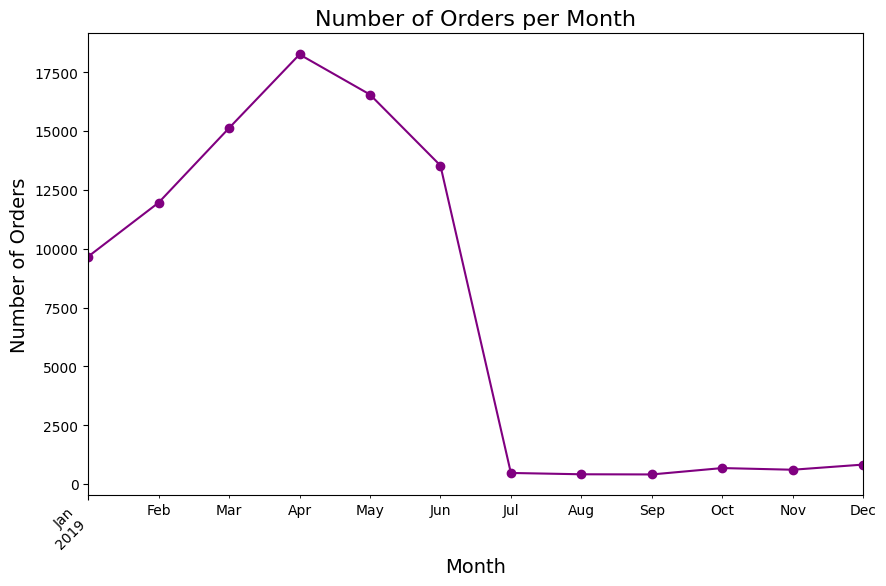

In [99]:
# Plot orders by month
monthly_orders = combined_data_2019_sales.groupby(combined_data_2019_sales['Order_Date'].dt.to_period('M')).size()
plt.figure(figsize = (10, 6))

monthly_orders.plot(kind = 'line', marker = 'o', color = 'purple')
plt.title('Number of Orders per Month', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Number of Orders', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

plt.grid(False)  # Add grid for better readability
plt.show()

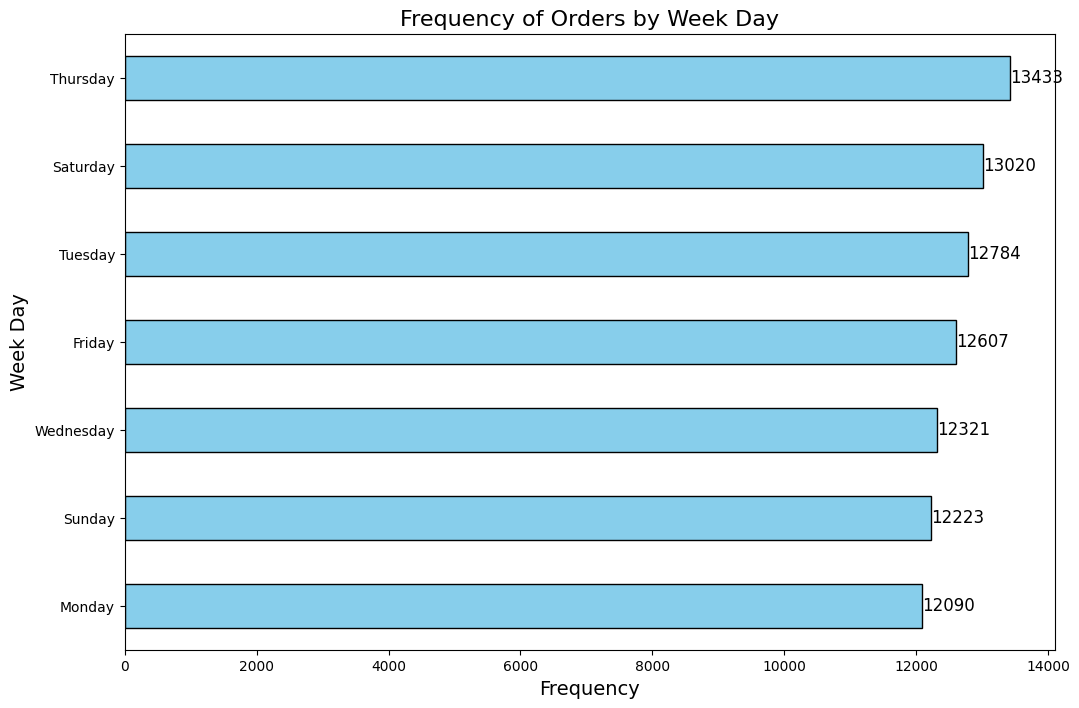

In [94]:
# Frequency counts
weekday_counts = combined_data_2019_sales['Week_Day'].value_counts()

# Plot the result as a horizontal bar chart
plt.figure(figsize = (12, 8))
weekday_counts.plot(kind = 'barh', color = 'skyblue', edgecolor = 'black')

# Add titles and labels
plt.title('Frequency of Orders by Week Day', fontsize = 16)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Week Day', fontsize = 14)
plt.gca().invert_yaxis()  # To display the highest frequency on top

# Add annotations for each bar
for index, value in enumerate(weekday_counts):
    plt.text(value, index, f'{value}', va = 'center', fontsize = 12, color = 'black')

plt.show()

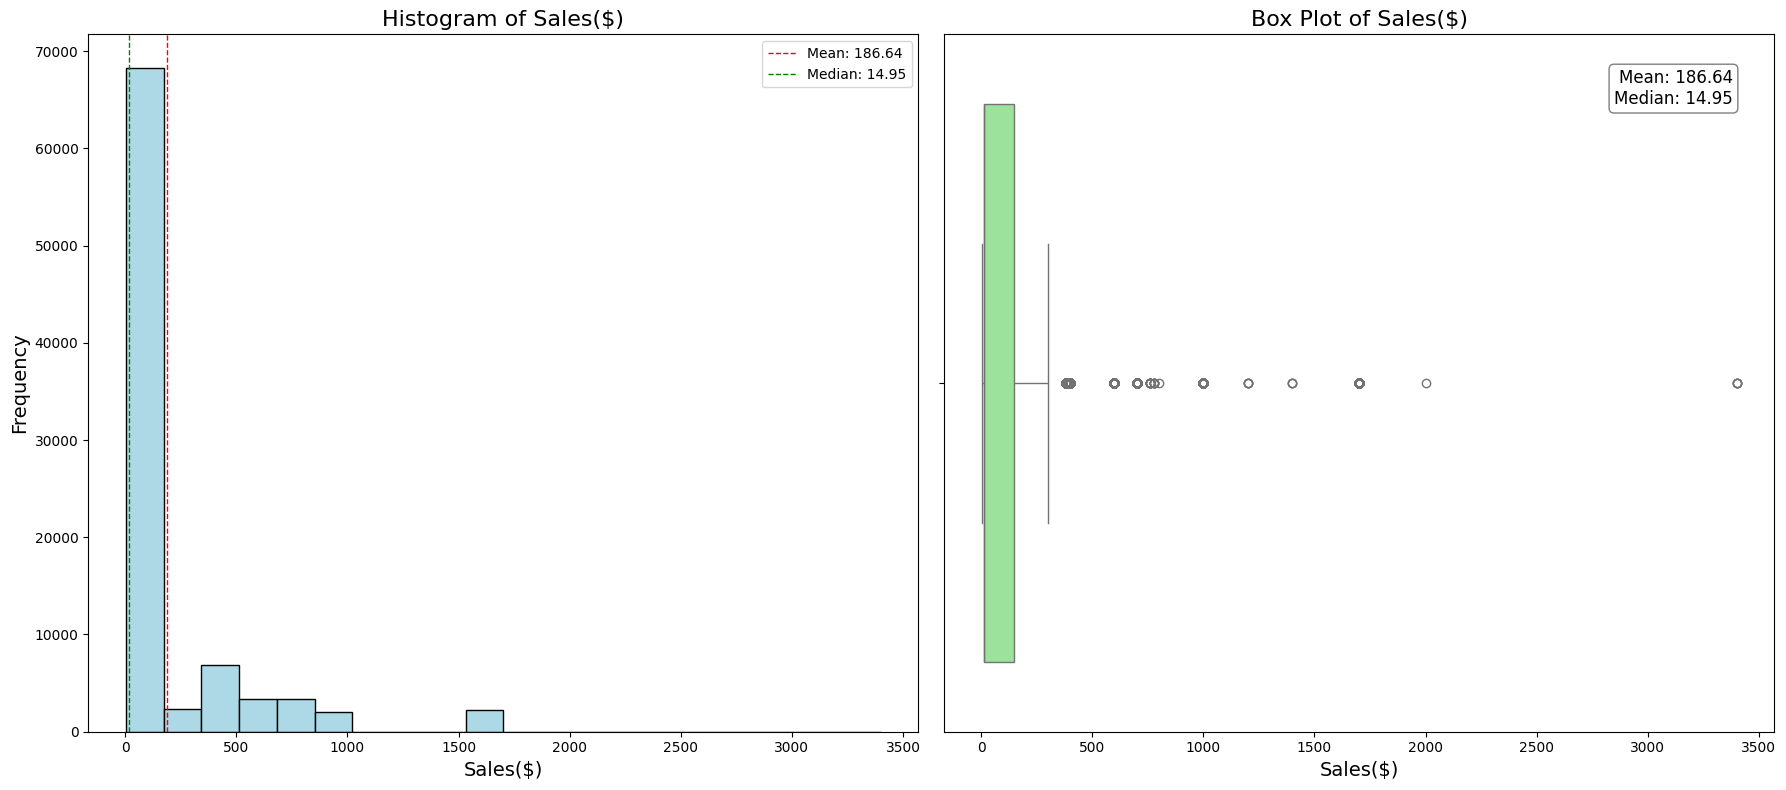

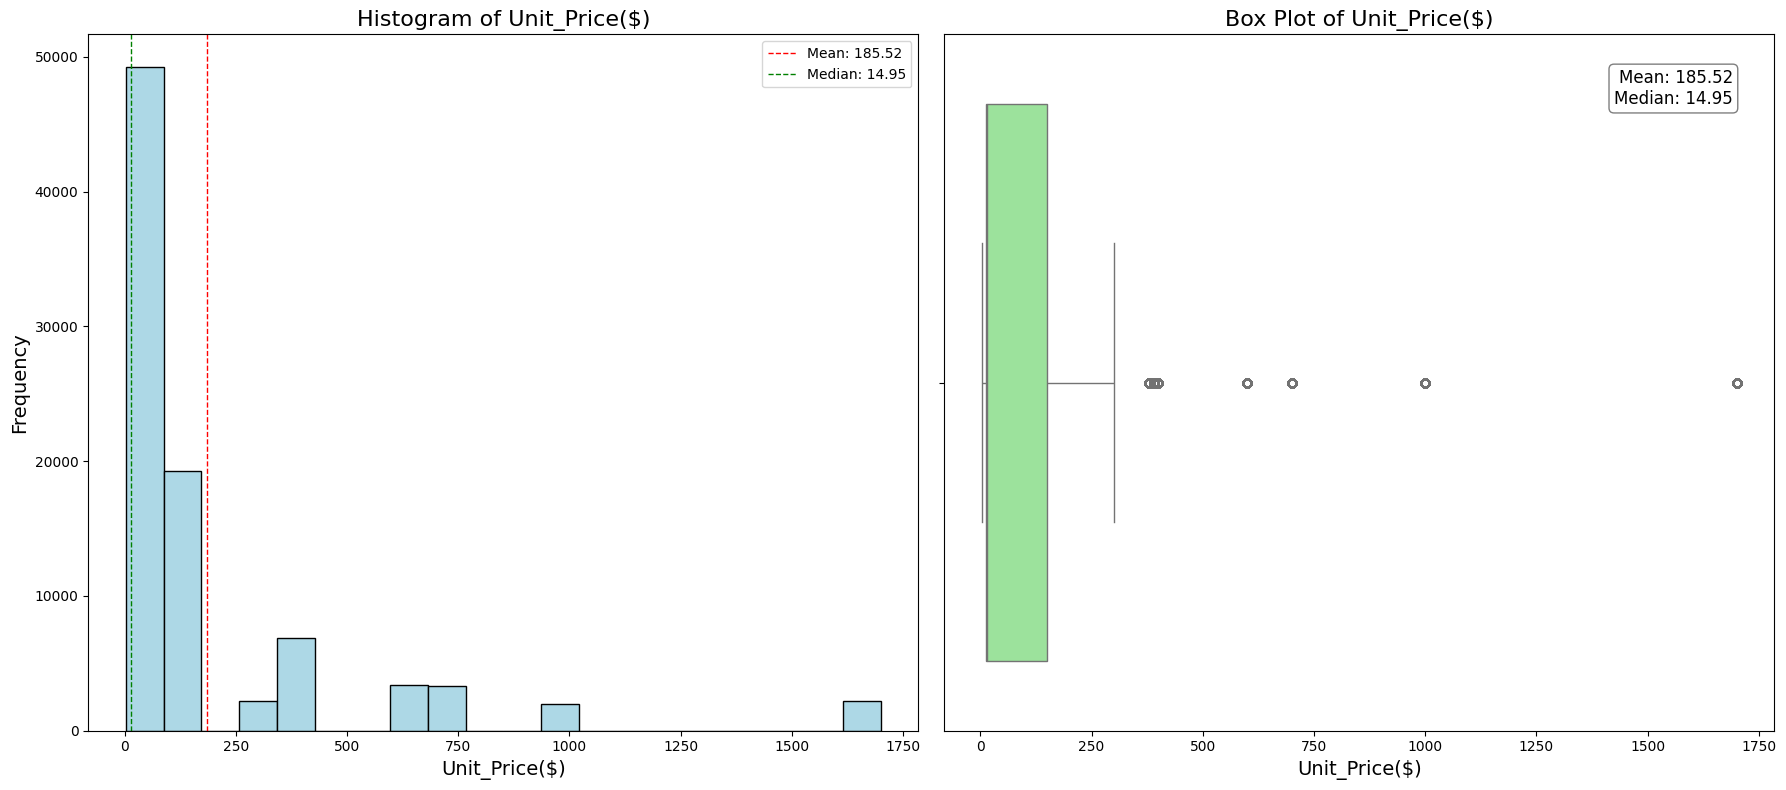

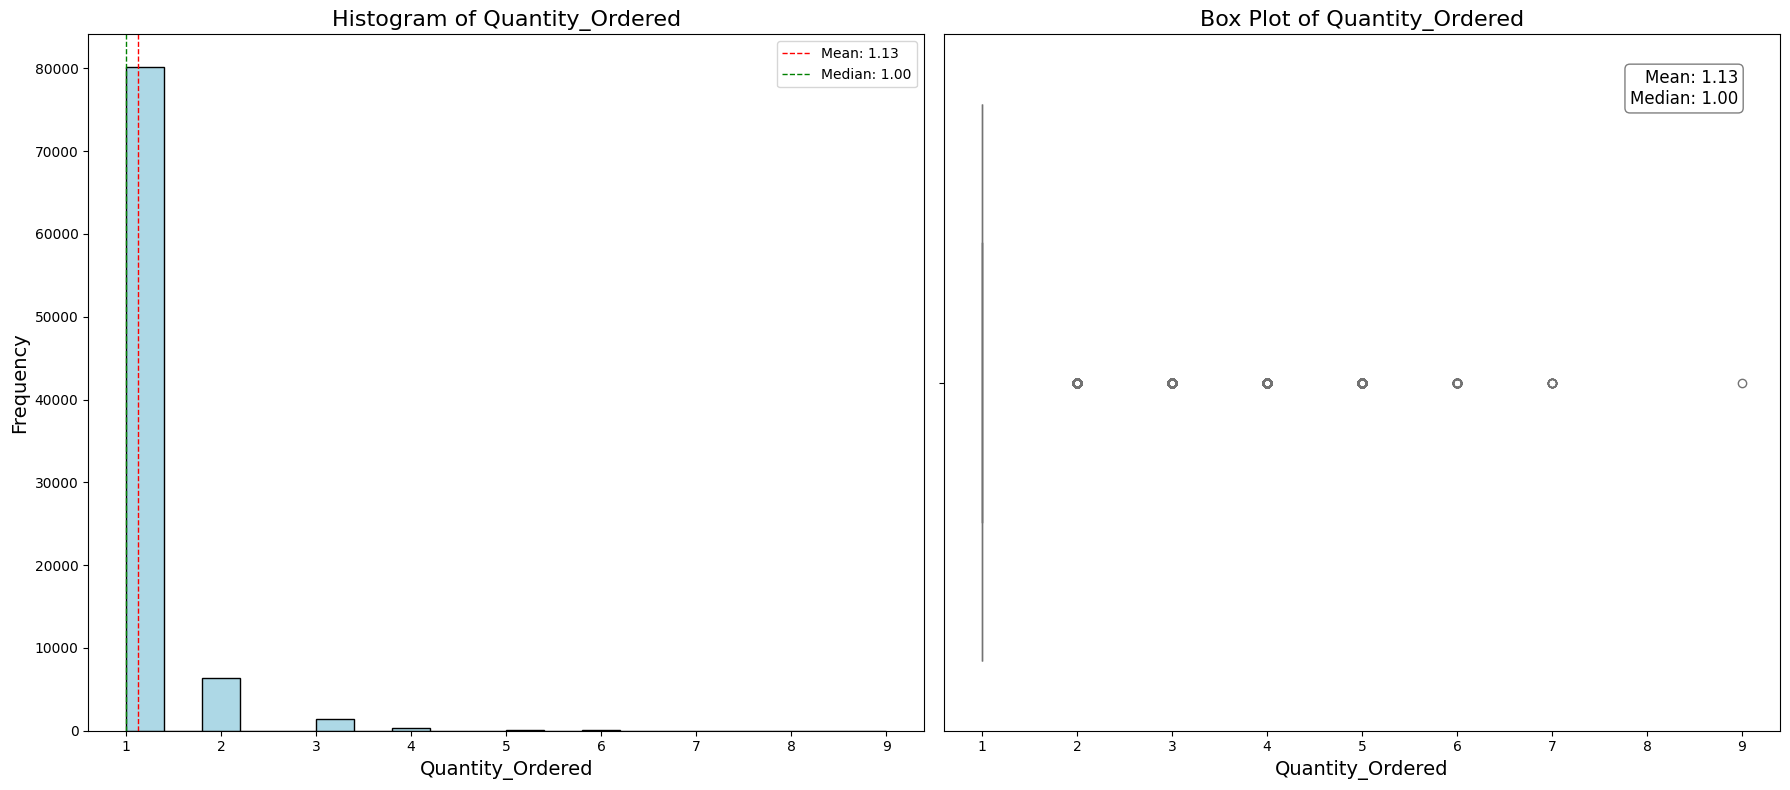

In [93]:
def plot_univariate_analysis(df, columns):
    
    for col in columns:
        plt.figure(figsize = (18, 8))

        # Histogram
        plt.subplot(1, 2, 1)
        plt.hist(df[col], bins = 20, color = 'lightblue', edgecolor = 'black')
        plt.title(f'Histogram of {col}', fontsize = 16)
        plt.xlabel(col, fontsize = 14)
        plt.ylabel('Frequency', fontsize = 14)

        # Annotate histogram
        mean = df[col].mean()
        median = df[col].median()
        std_dev = df[col].std()
        plt.axvline(mean, color = 'r', linestyle = 'dashed', linewidth = 1, label = f'Mean: {mean:.2f}')
        plt.axvline(median, color = 'g', linestyle = 'dashed', linewidth = 1, label = f'Median: {median:.2f}')
        plt.legend()

        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x = df[col], color = 'lightgreen')
        plt.title(f'Box Plot of {col}', fontsize = 16)
        plt.xlabel(col, fontsize = 14)

        # Annotate box plot
        ax = plt.gca()
        mean = df[col].mean()
        median = df[col].median()
        props = dict(boxstyle = "round", facecolor = "white", alpha = 0.5)
        ax.text(0.95, 0.95, f'Mean: {mean:.2f}\nMedian: {median:.2f}', transform = ax.transAxes, fontsize = 12,
                verticalalignment = 'top', horizontalalignment = 'right', bbox = props)

        plt.tight_layout()
        plt.show()

# Data to plot
columns_to_plot = ['Sales($)', 'Unit_Price($)', 'Quantity_Ordered']
plot_univariate_analysis(combined_data_2019_sales, columns_to_plot)



Product
USB-C Charging Cable          10332
Lightning Charging Cable      10288
AA Batteries (4-pack)          9803
AAA Batteries (4-pack)         9786
Wired Headphones               9000
Apple Airpods Headphones       7395
Bose SoundSport Headphones     6323
27in FHD Monitor               3623
iPhone                         3328
34in Ultrawide Monitor         2989
27in 4K Gaming Monitor         2884
Google Phone                   2691
Macbook Pro Laptop             2238
Flatscreen TV                  2226
ThinkPad Laptop                1982
20in Monitor                   1901
Vareebadd Phone                1019
LG Washing Machine              339
LG Dryer                        331
Name: count, dtype: int64


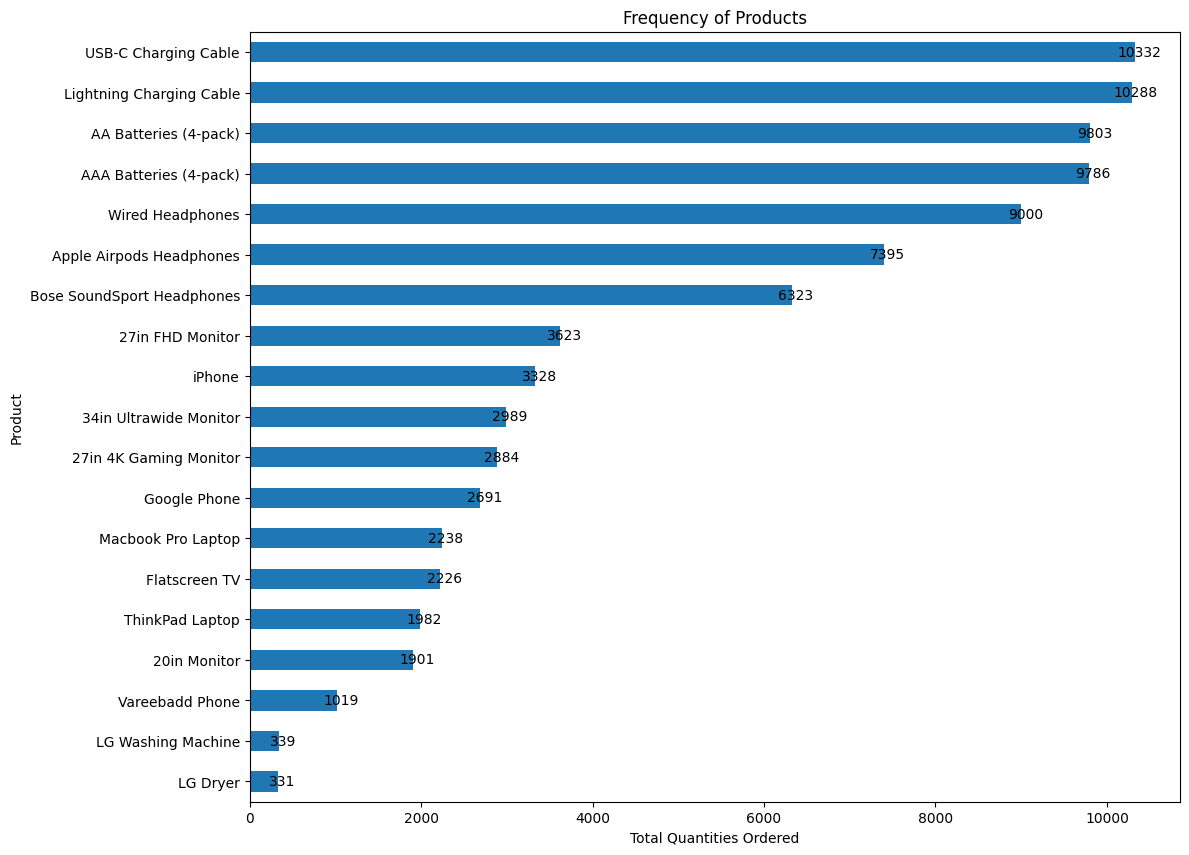

In [75]:
# Count the unique items in the 'Product' field and display their counts
product_counts = combined_data_2019_sales['Product'].value_counts()

# Print the counts
print(product_counts)

# Sort the product counts in descending order
product_counts_sorted = product_counts.sort_values(ascending = True)

# Plot the total sales for the products
ax = product_counts_sorted.plot(kind = 'barh', figsize = (12, 10), title = 'Frequency of Products', legend = False)
plt.ticklabel_format(axis = 'x', style = 'plain')

# Annotate the bars
for i in ax.patches:
    ax.annotate(f'{int(i.get_width())}', 
                (i.get_width() + 50, i.get_y() + i.get_height()/2),  # Position the annotation
                ha = 'center', va = 'center', fontsize = 10, color = 'black')

# Set labels
ax.set_xlabel('Total Quantities Ordered')
ax.set_ylabel('Product')

# Show the plot
plt.show()

- #### 4.3 **Bivariate Analysis**

<Figure size 1400x800 with 0 Axes>

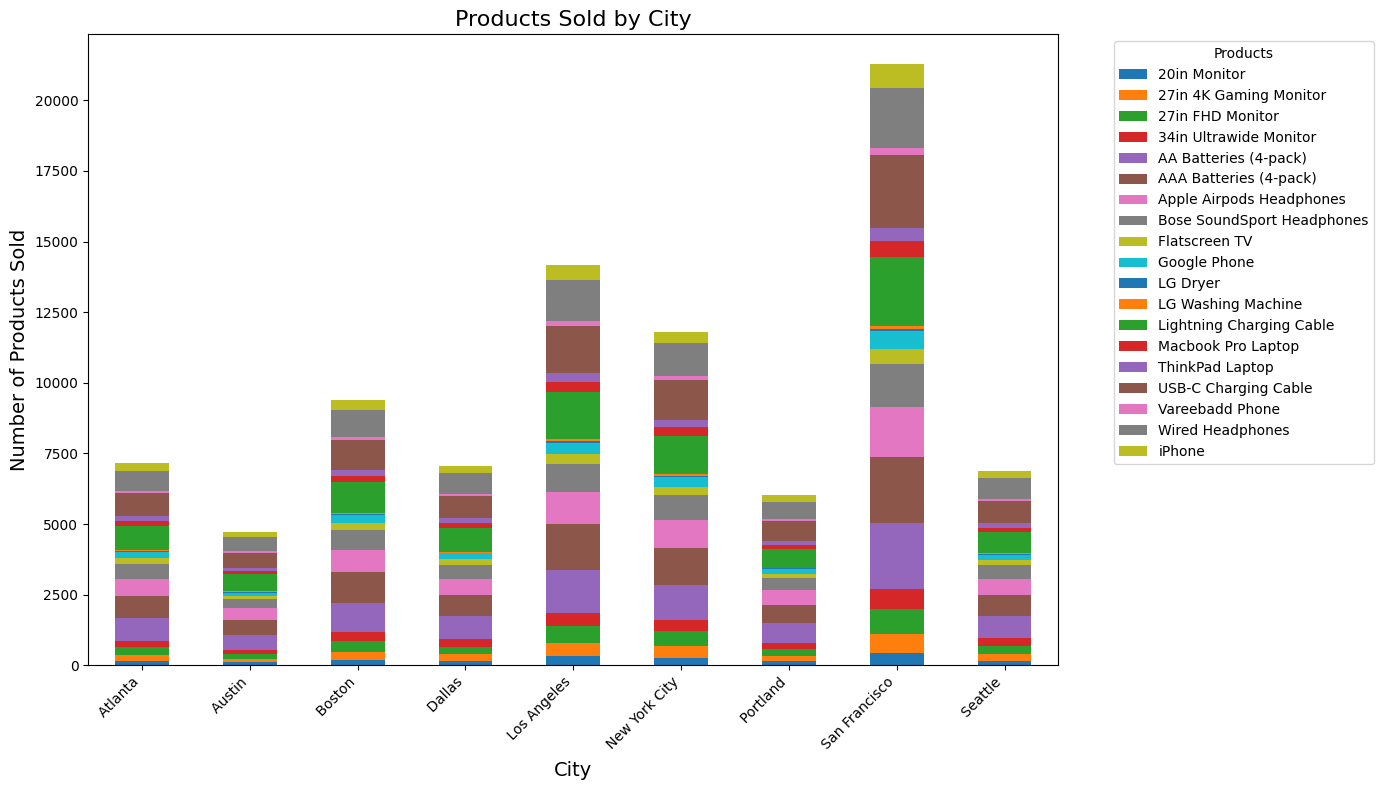

In [76]:
# Group the data by city and product, and count the occurrences
products_by_city = combined_data_2019_sales.groupby(['City', 'Product']).size().unstack().fillna(0)

# Plot a stacked bar chart
plt.figure(figsize = (14, 8))
products_by_city.plot(kind = 'bar', stacked = True, figsize = (14, 8))

# Add titles and labels
plt.title('Products Sold by City', fontsize = 16)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Number of Products Sold', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

# Show the plot
plt.legend(title = 'Products', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

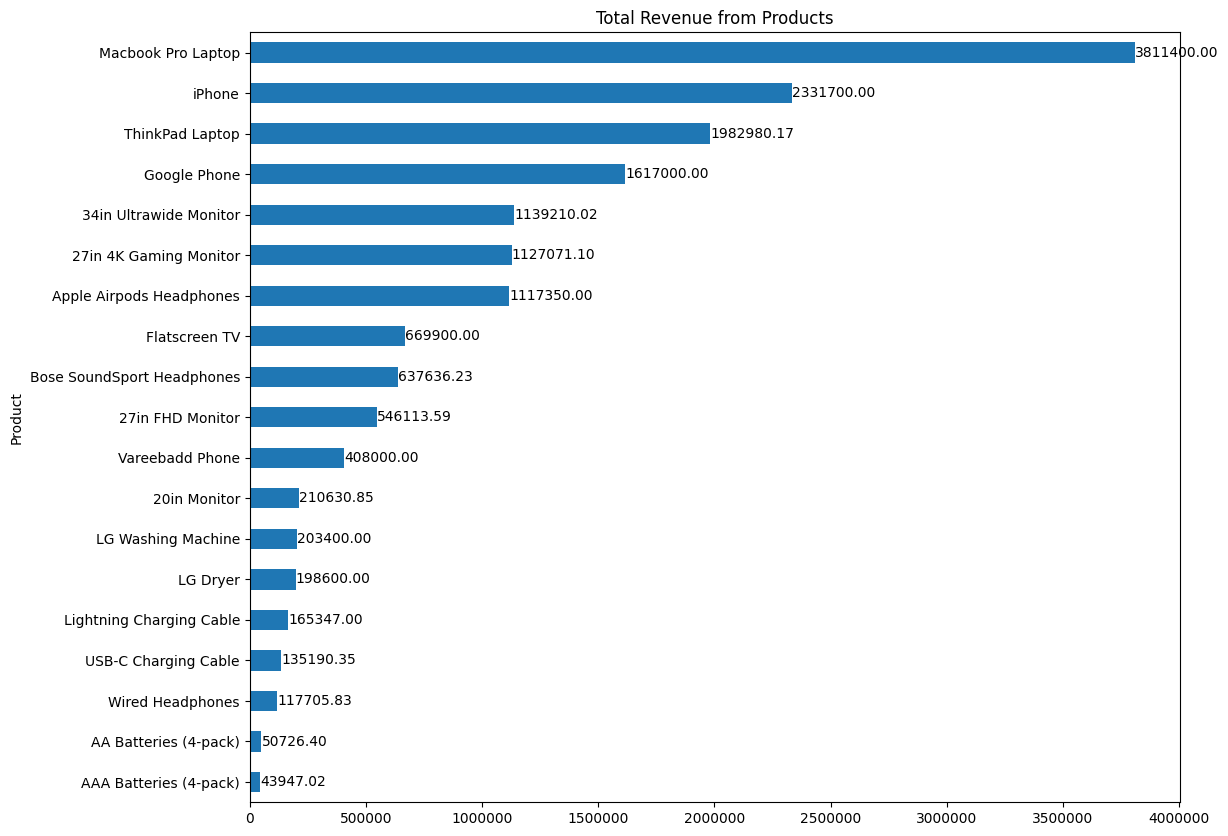

In [78]:
# Filter Product Sales for the days
product_sales = combined_data_2019_sales.groupby('Product')['Sales($)'].sum().sort_values(ascending = True).reset_index()

# Plot the total sales for the products
ax = product_sales.plot(kind = 'barh', x = 'Product', figsize = (12, 10), title = 'Total Revenue from Products', legend = False)

# Format the x-axis tick labels in plain numeric format (no scientific notation)
plt.ticklabel_format(axis = 'x', style = 'plain')

# Annotate each bar with the corresponding sales value
for index, value in enumerate(product_sales['Sales($)']):
    ax.text(value, index, f'{value:.2f}', va='center')

# Display the plot
plt.show()

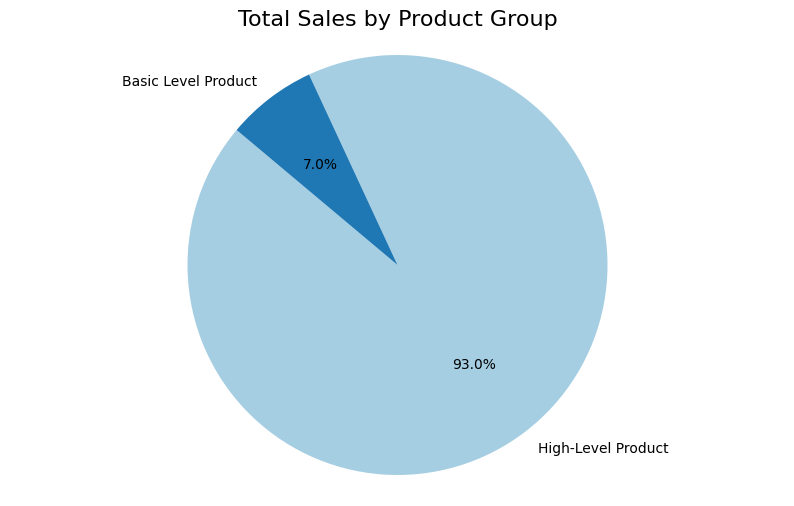

In [79]:
# Group by Product Group and sum the Sales($) for each group
sales_by_product_group = combined_data_2019_sales.groupby('Product_Group')['Sales($)'].sum().sort_values(ascending = False)

# Plot the result as a pie chart
plt.figure(figsize = (10, 6))
plt.pie(sales_by_product_group, labels = sales_by_product_group.index, autopct = '%1.1f%%', startangle = 140, colors = plt.cm.Paired.colors)

# Add a title
plt.title('Total Sales by Product Group', fontsize = 16)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

plt.show()

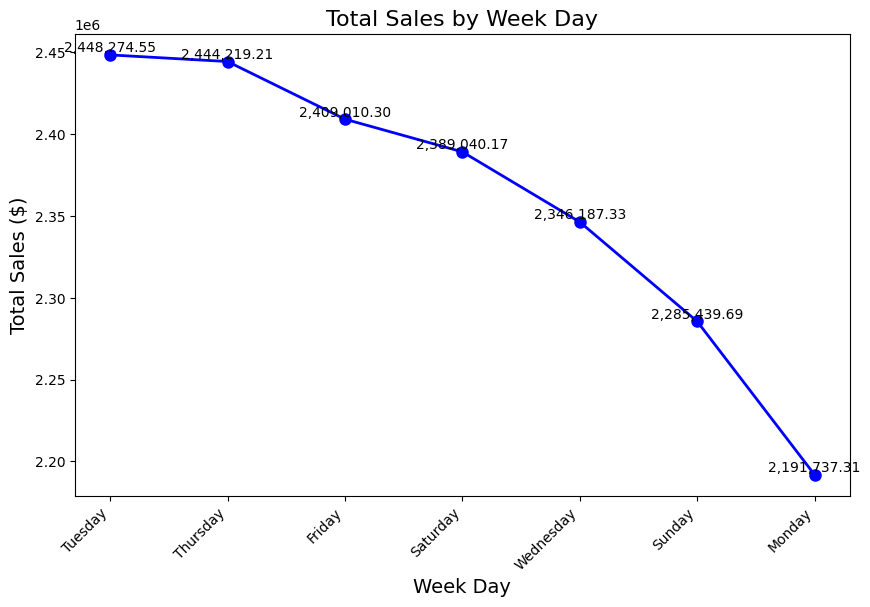

In [85]:
# Group by Week_Day and sum the Sales($) for each day
sales_by_weekday = combined_data_2019_sales.groupby('Week_Day')['Sales($)'].sum().sort_values(ascending = False)

# Plot the result as a line plot
plt.figure(figsize = (10, 6))
plt.plot(sales_by_weekday.index, sales_by_weekday, marker = 'o', color = 'blue', linestyle = '-', linewidth = 2, markersize = 8)

# Add titles and labels
plt.title('Total Sales by Week Day', fontsize = 16)
plt.xlabel('Week Day', fontsize = 14)
plt.ylabel('Total Sales ($)', fontsize = 14)

# Rotate x-axis labels for better readability
plt.xticks(rotation = 45, ha = 'right')

# Annotate each data point with the sales value
for i, value in enumerate(sales_by_weekday):
    plt.text(i, value, f'{value:,.2f}', ha = 'center', va = 'bottom', fontsize = 10, color = 'black')

plt.grid(False)  # Add grid for better readability
plt.show()

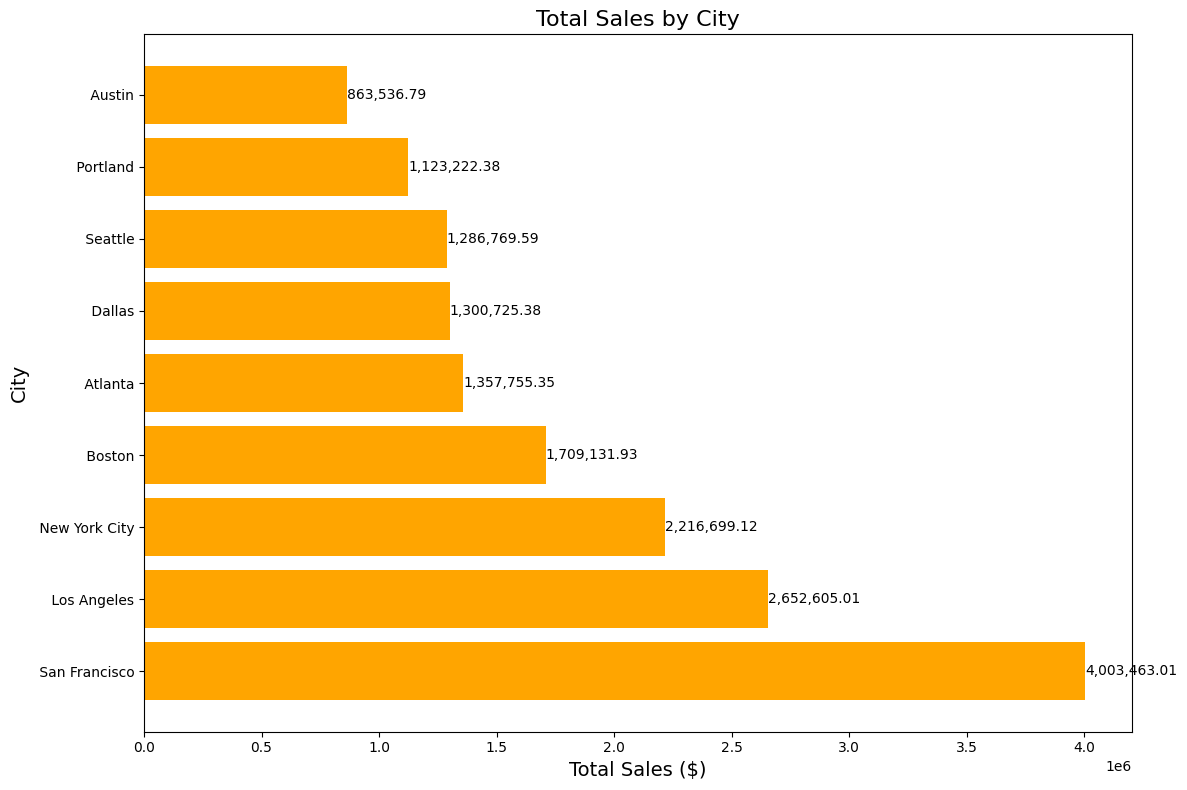

In [86]:
# Group by City and sum the Sales($) for each city
sales_by_city = combined_data_2019_sales.groupby('City')['Sales($)'].sum().sort_values(ascending = False)

# Plot the result as a horizontal bar plot
plt.figure(figsize = (12, 8))
bars = plt.barh(sales_by_city.index, sales_by_city, color = 'orange')

# Add titles and labels
plt.title('Total Sales by City', fontsize = 16)
plt.xlabel('Total Sales ($)', fontsize = 14)
plt.ylabel('City', fontsize = 14)

# Annotate each bar with the sales value
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():,.2f}', 
             va = 'center', ha = 'left', 
             fontsize = 10, color = 'black')

plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

- #### 4.4 **Multivariate Analysis**

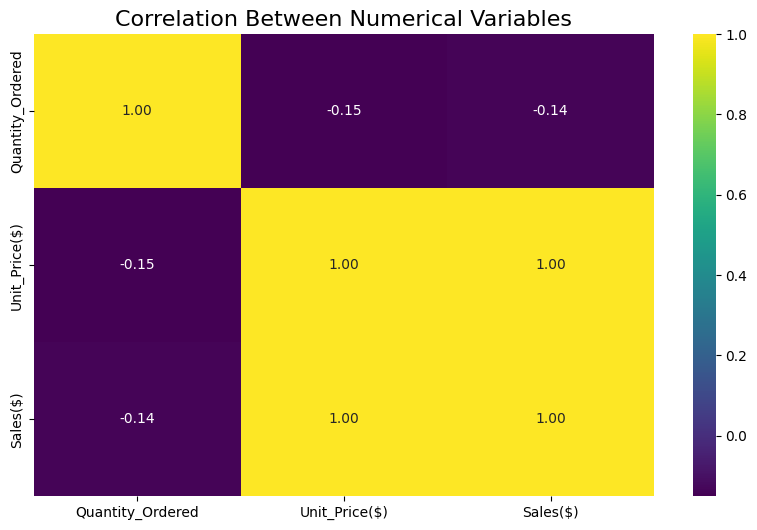

In [80]:
# Select numerical columns for correlation analysis
numerical_cols = ['Quantity_Ordered', 'Unit_Price($)', 'Sales($)']

# Create a correlation matrix
correlation_matrix = combined_data_2019_sales[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'viridis', fmt = '.2f')

# Add title
plt.title('Correlation Between Numerical Variables', fontsize = 16)

plt.show()

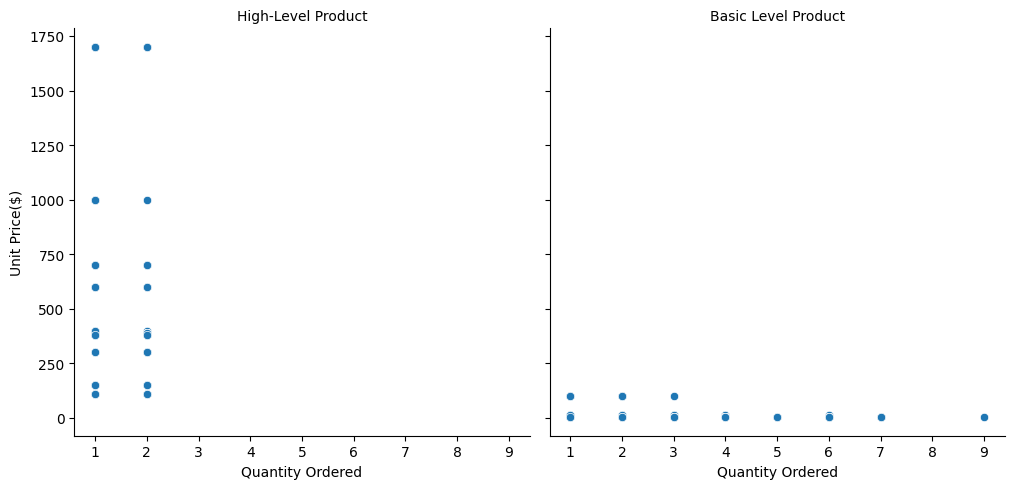

In [82]:
# Facet Grid to explore 'Unit Price($)' and 'Quantity Ordered' by 'Product Group'
g = sns.FacetGrid(combined_data_2019_sales, col = 'Product_Group', margin_titles = True, height = 5, col_wrap = 3) 
g.map_dataframe(sns.scatterplot, x = 'Quantity_Ordered', y = 'Unit_Price($)', hue = None, palette = 'deep') 

# Add axis labels
g.set_axis_labels('Quantity Ordered', 'Unit Price($)')

# Set titles for each subplot with the product group name
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()


### 5. **Analytical Questions and Answers**

5.1 **How much money did we make in 2019?**

In [100]:
f"The total amount of money made in 2019 was ${format(combined_data_2019_sales['Sales($)'].sum(), ',.2f')}"

'The total amount of money made in 2019 was $16,513,908.56'

##### 5.2 **Can we identify any seasonality in the sales?**

To identify seasonality in sales, we'll analyze the sales data over time (days, weeks, and months). I'll plot the total sales for each day, week, and month over the entire duration of the dataset and look for recurring patterns or trends.

5.2.1 **Seasonality by Day of the Week**

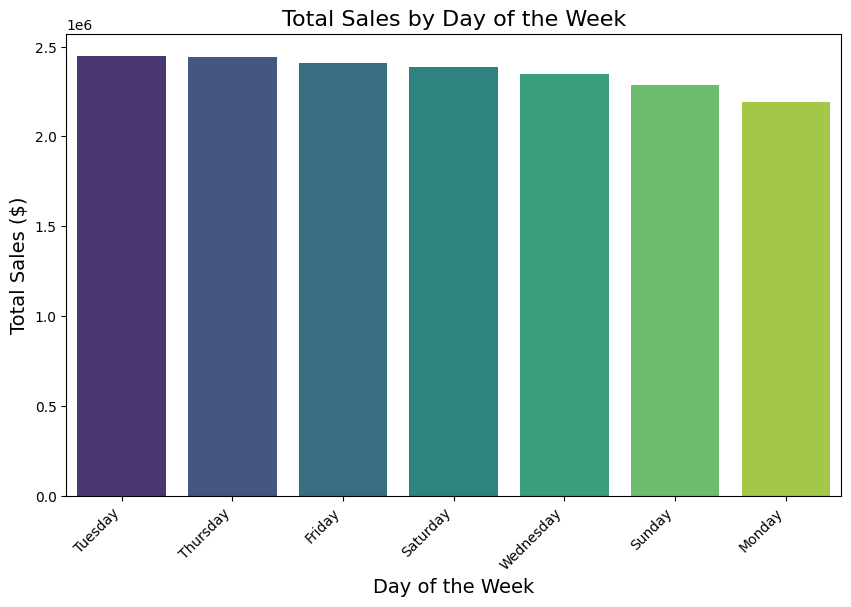

In [103]:
# Group by day of the week and sum the sales for each day
sales_by_weekday = combined_data_2019_sales.groupby('Week_Day')['Sales($)'].sum().sort_values(ascending = False)

# Plot the result
plt.figure(figsize = (10, 6))
sns.barplot(x = sales_by_weekday.index, y = sales_by_weekday.values, palette = 'viridis')

# Add titles and labels
plt.title('Total Sales by Day of the Week', fontsize = 16)
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Total Sales ($)', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

# Annotate each bar with its corresponding value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'bottom', 
                xytext = (0, 5), 
                textcoords = 'offset points')

# Show the plot
plt.show()

5.2.2 **Seasonality by Week of The Year**

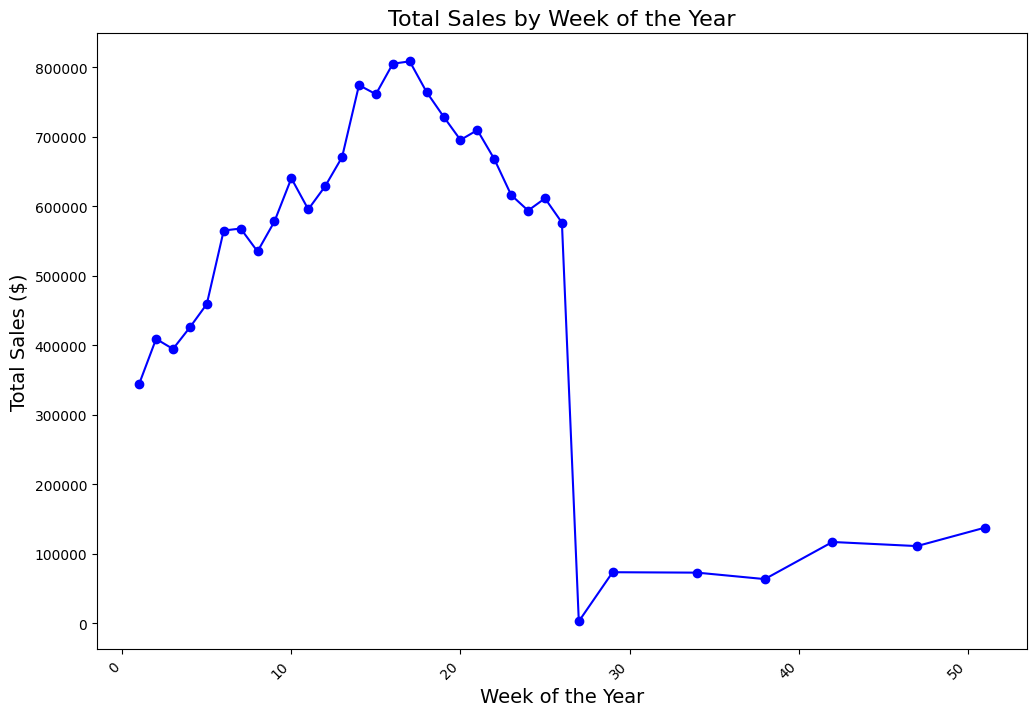

In [111]:
# Extract week of the year from Order_Date
combined_data_2019_sales['Week_Of_Year'] = combined_data_2019_sales['Order_Date'].dt.isocalendar().week

# Group by week of the year and sum the sales for each week
sales_by_week_of_year = combined_data_2019_sales.groupby('Week_Of_Year')['Sales($)'].sum()

# Plot the result
plt.figure(figsize = (12, 8))
ax = sales_by_week_of_year.plot(kind = 'line', marker = 'o', color = 'blue')

# Add titles and labels
plt.title('Total Sales by Week of the Year', fontsize = 16)
plt.xlabel('Week of the Year', fontsize = 14)
plt.ylabel('Total Sales ($)', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

# Show the plot
plt.show()


5.2.3 **Seasonality by Months of the Year**

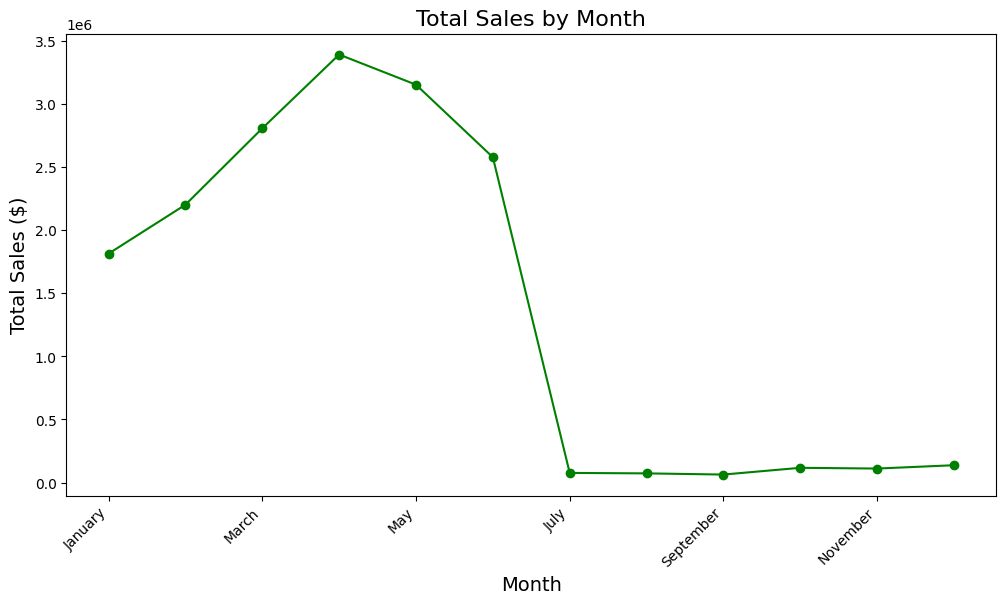

In [117]:
# Extract month from Order_Date
combined_data_2019_sales['Month'] = combined_data_2019_sales['Order_Date'].dt.month_name()

# Group by month and sum the sales for each month
sales_by_month = combined_data_2019_sales.groupby('Month')['Sales($)'].sum()

# Reorder months to ensure correct chronological order
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month = sales_by_month.reindex(ordered_months)

# Plot the result
plt.figure(figsize = (12, 6))
sales_by_month.plot(kind = 'line', marker = 'o', color = 'green')

# Add titles and labels
plt.title('Total Sales by Month', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Total Sales ($)', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

# Show the plot
plt.show()


5.3 **What are our best and worst-selling products?**

To identify the best and worst-selling products from the combined_data_2019_sales dataframe, I will look at the total sales figures for each product. Here’s how I will do this:

1. Calculate Total Sales and Quantity Ordered by Product

2. Identify the Best and Worst-Selling Products by Sales and Quantity

Best Selling Products by Total Sales:
                   Product  Total_Sales  Total_Quantity_Ordered
13      Macbook Pro Laptop   3811400.00                    2242
18                  iPhone   2331700.00                    3331
14         ThinkPad Laptop   1982980.17                    1983
9             Google Phone   1617000.00                    2695
3   34in Ultrawide Monitor   1139210.02                    2998

Worst Selling Products by Total Sales:
                     Product  Total_Sales  Total_Quantity_Ordered
5     AAA Batteries (4-pack)     43947.02                   14698
4      AA Batteries (4-pack)     50726.40                   13210
17          Wired Headphones    117705.83                    9817
15      USB-C Charging Cable    135190.35                   11313
12  Lightning Charging Cable    165347.00                   11060

Best Selling Products by Total Quantity Ordered:
                     Product  Total_Sales  Total_Quantity_Ordered
5     AAA Batteries (4-pac

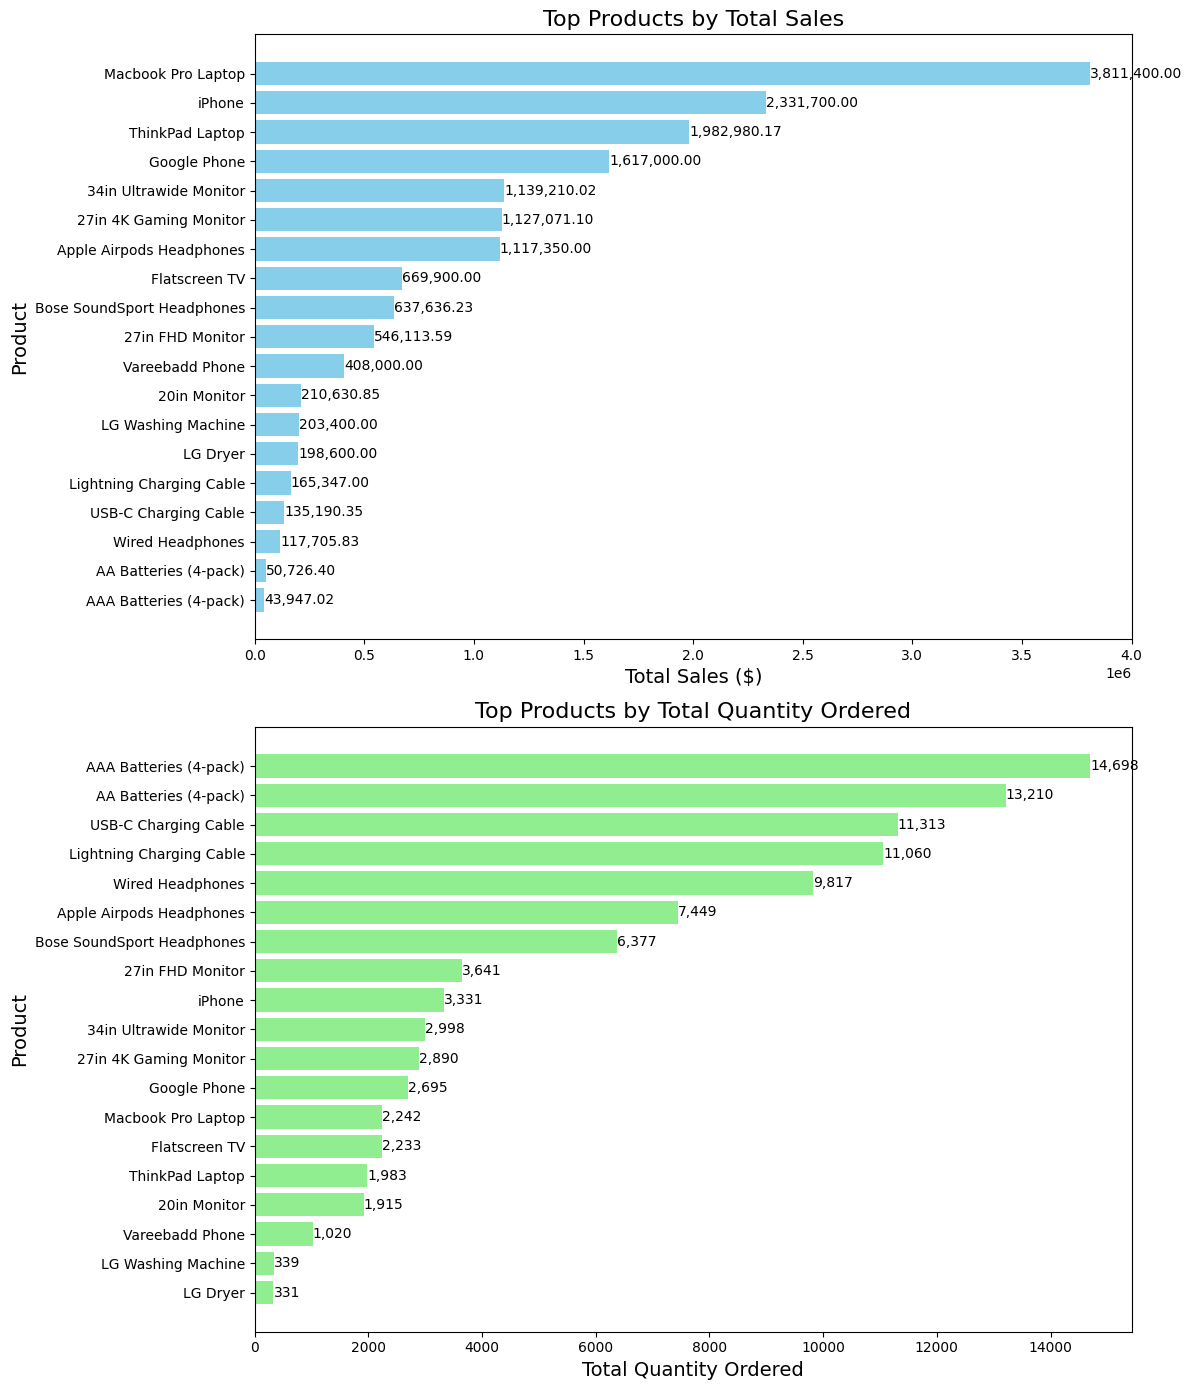

In [119]:
# Group by Product and sum the Sales($) and Quantity_Ordered
product_performance = combined_data_2019_sales.groupby('Product').agg(
    Total_Sales = ('Sales($)', 'sum'),
    Total_Quantity_Ordered = ('Quantity_Ordered', 'sum')
).reset_index()

# Sort products by Total Sales and Total Quantity Ordered
best_selling_by_sales = product_performance.sort_values(by = 'Total_Sales', ascending = False)
worst_selling_by_sales = product_performance.sort_values(by = 'Total_Sales', ascending = True)

best_selling_by_quantity = product_performance.sort_values(by = 'Total_Quantity_Ordered', ascending = False)
worst_selling_by_quantity = product_performance.sort_values(by = 'Total_Quantity_Ordered', ascending = True)

# Display the top and bottom products for both metrics
print("Best Selling Products by Total Sales:")
print(best_selling_by_sales.head(5))

print("\nWorst Selling Products by Total Sales:")
print(worst_selling_by_sales.head(5))

print("\nBest Selling Products by Total Quantity Ordered:")
print(best_selling_by_quantity.head(5))

print("\nWorst Selling Products by Total Quantity Ordered:")
print(worst_selling_by_quantity.head(5))

# Plot Total Sales and Total Quantity Ordered
fig, ax = plt.subplots(2, 1, figsize = (12, 14))

# Plot Total Sales
ax[0].barh(best_selling_by_sales['Product'], best_selling_by_sales['Total_Sales'], color = 'skyblue')
ax[0].set_title('Top Products by Total Sales', fontsize = 16)
ax[0].set_xlabel('Total Sales ($)', fontsize = 14)
ax[0].set_ylabel('Product', fontsize = 14)
ax[0].invert_yaxis()  # Highest sales on top

# Annotate each bar
for index, value in enumerate(best_selling_by_sales['Total_Sales']):
    ax[0].text(value, index, f'{value:,.2f}', va = 'center')

# Plot Total Quantity Ordered
ax[1].barh(best_selling_by_quantity['Product'], best_selling_by_quantity['Total_Quantity_Ordered'], color = 'lightgreen')
ax[1].set_title('Top Products by Total Quantity Ordered', fontsize = 16)
ax[1].set_xlabel('Total Quantity Ordered', fontsize = 14)
ax[1].set_ylabel('Product', fontsize = 14)
ax[1].invert_yaxis()  # Highest quantity on top

# Annotate each bar
for index, value in enumerate(best_selling_by_quantity['Total_Quantity_Ordered']):
    ax[1].text(value, index, f'{value:,.0f}', va = 'center')

plt.tight_layout()
plt.show()


5.4 **How do sales compare to previous months or weeks?**

To compare sales to previous months or weeks using the combined_data_2019_sales dataset, I will do the following:

1. Prepare the Data:

    - Extract month and week information from the Order_Date.
    - Aggregate sales data by month and week.

2. Calculate Changes:

    - Compute the changes in sales from previous periods.

3. Visualize the Comparisons:

    - Use line plots and/or bar plots to show sales trends over time.

*Comparing Sales by Month*

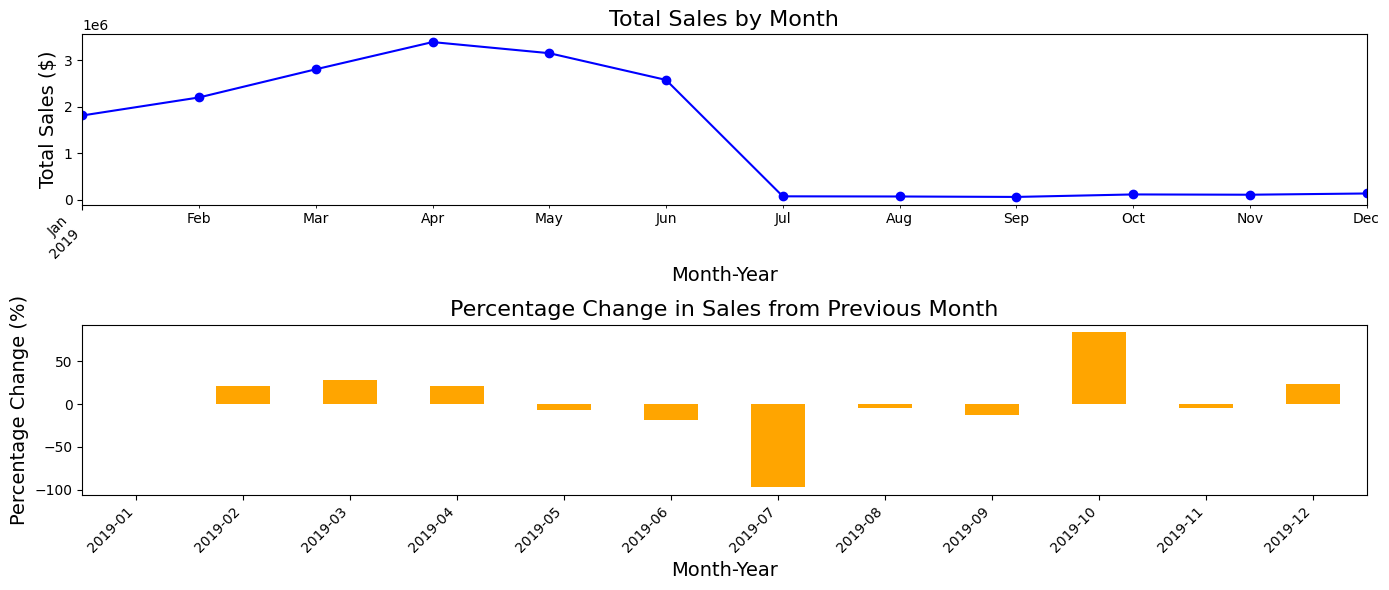

In [120]:
# Extract month and year from Order_Date
combined_data_2019_sales['Month_Year'] = combined_data_2019_sales['Order_Date'].dt.to_period('M')

# Group by month and year and sum the sales
monthly_sales = combined_data_2019_sales.groupby('Month_Year')['Sales($)'].sum()

# Calculate the percentage change from previous month
monthly_sales_change = monthly_sales.pct_change() * 100

# Plot total sales and percentage change
plt.figure(figsize = (14, 6))

# Total Sales
plt.subplot(2, 1, 1)
monthly_sales.plot(kind = 'line', marker = 'o', color = 'blue')
plt.title('Total Sales by Month', fontsize = 16)
plt.xlabel('Month-Year', fontsize = 14)
plt.ylabel('Total Sales ($)', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

# Percentage Change
plt.subplot(2, 1, 2)
monthly_sales_change.plot(kind = 'bar', color = 'orange')
plt.title('Percentage Change in Sales from Previous Month', fontsize = 16)
plt.xlabel('Month-Year', fontsize = 14)
plt.ylabel('Percentage Change (%)', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

*Comparing Sales by Weeks*

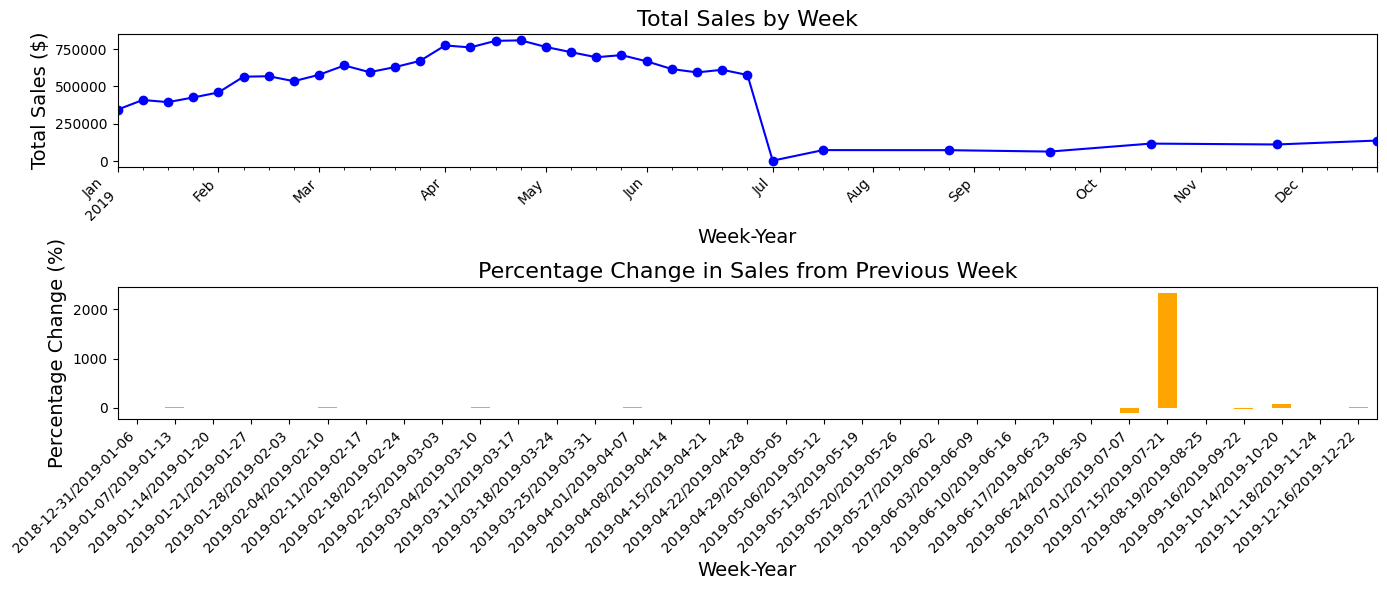

In [121]:
# Extract week and year from Order_Date
combined_data_2019_sales['Week_Year'] = combined_data_2019_sales['Order_Date'].dt.to_period('W')

# Group by week and year and sum the sales
weekly_sales = combined_data_2019_sales.groupby('Week_Year')['Sales($)'].sum()

# Calculate the percentage change from previous week
weekly_sales_change = weekly_sales.pct_change() * 100

# Plot total sales and percentage change
plt.figure(figsize = (14, 6))

# Total Sales
plt.subplot(2, 1, 1)
weekly_sales.plot(kind = 'line', marker = 'o', color = 'blue')
plt.title('Total Sales by Week', fontsize = 16)
plt.xlabel('Week-Year', fontsize = 14)
plt.ylabel('Total Sales ($)', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

# Percentage Change
plt.subplot(2, 1, 2)
weekly_sales_change.plot(kind = 'bar', color = 'orange')
plt.title('Percentage Change in Sales from Previous Week', fontsize = 16)
plt.xlabel('Week-Year', fontsize = 14)
plt.ylabel('Percentage Change (%)', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()


- January to February: There is a positive growth rate of approximately 21.3%, indicating an increase in sales from January to February.

- February to March: Another positive growth rate of about 27.5%, indicating further growth in sales from February to March.

- March to April: Sales continue to grow with a positive growth rate of around 20.8% from March to April.

- April to May: However, there is a slight decrease in sales from April to May, indicated by a negative growth rate of approximately -7%.

- May to June: Sales decline further with a negative growth rate of about -18.2% from May to June.

- June to July: Sales decline further with a negative growth rate of about -97% from June to July.

- July to August: Sales decrease again, indicated by a negative growth rate of approximately -4.8% from July to August.

- August to September: The decline lessens slightly with a negative growth rate of about -12.7% from August to September.

- September to October: There is a significant increase in sales with a positive growth rate of approximately 83.7% from September to October.

- October to November: However, sales decline again with a negative growth rate of around -5% from October to November.

- November to December: Sales experience a substantial increase with a positive growth rate of about 23.7% from November to December.

Overall, the month-over-month growth rates suggest that sales are increasing at a steady pace over the course of the year.



5.5 **Which cities are our products delivered to most?**

To determine which cities receive the most deliveries of your products, you can analyze the sales data by city. Here's how you can approach this:

1. Aggregate Sales Data by City:
    - Group the data by city and sum the sales for each city.

2. Visualize the Results:
    - Use a bar chart to show the total sales by city.

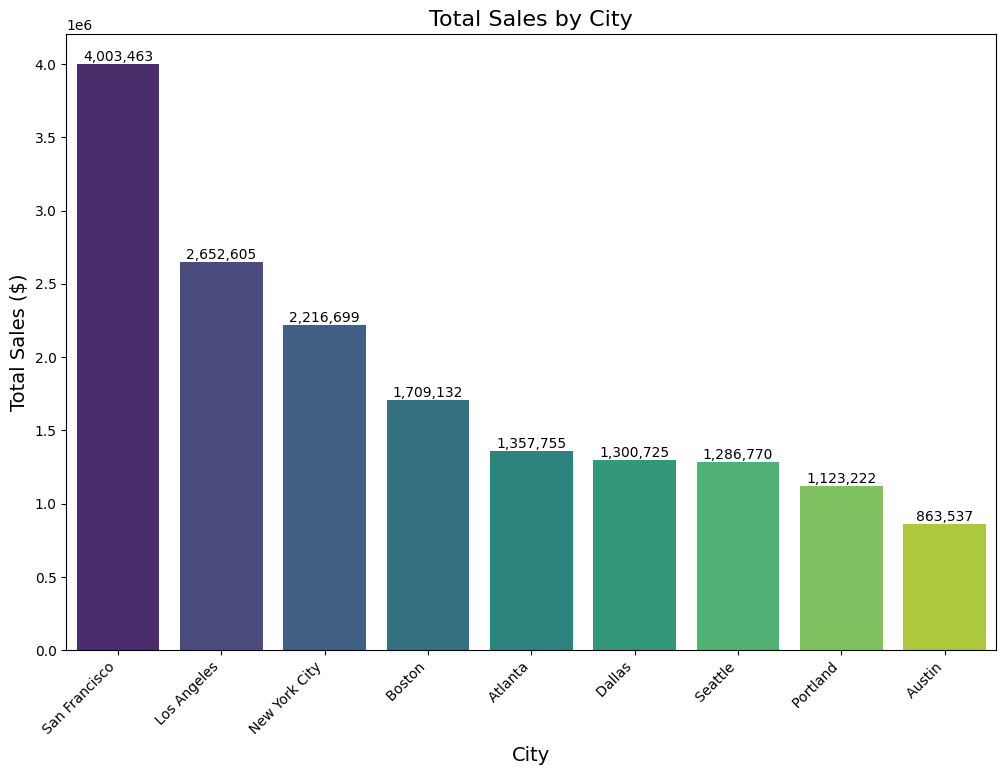

In [122]:
# Group by City and sum the Sales($) for each city
sales_by_city = combined_data_2019_sales.groupby('City')['Sales($)'].sum().sort_values(ascending = False)

# Plot the result
plt.figure(figsize = (12, 8))
sns.barplot(x = sales_by_city.index, y = sales_by_city.values, palette = 'viridis')

# Annotate each bar with the sales value
for index, value in enumerate(sales_by_city):
    plt.text(index, value, f'{value:,.0f}', ha = 'center', va = 'bottom', fontsize = 10)

# Add titles and labels
plt.title('Total Sales by City', fontsize = 16)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Total Sales ($)', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

# Show the plot
plt.show()

5.6 **How do product categories compare in revenue generated and quantities ordered?**

To compare product categories in terms of revenue generated and quantities ordered, you can follow these steps:

1. Aggregate Data by Product Category:
    - Group the data by product category and calculate the total revenue and total quantity ordered for each category.

2. Visualize the Results:
    - Create bar plots to show the total revenue and total quantity ordered for each product category.

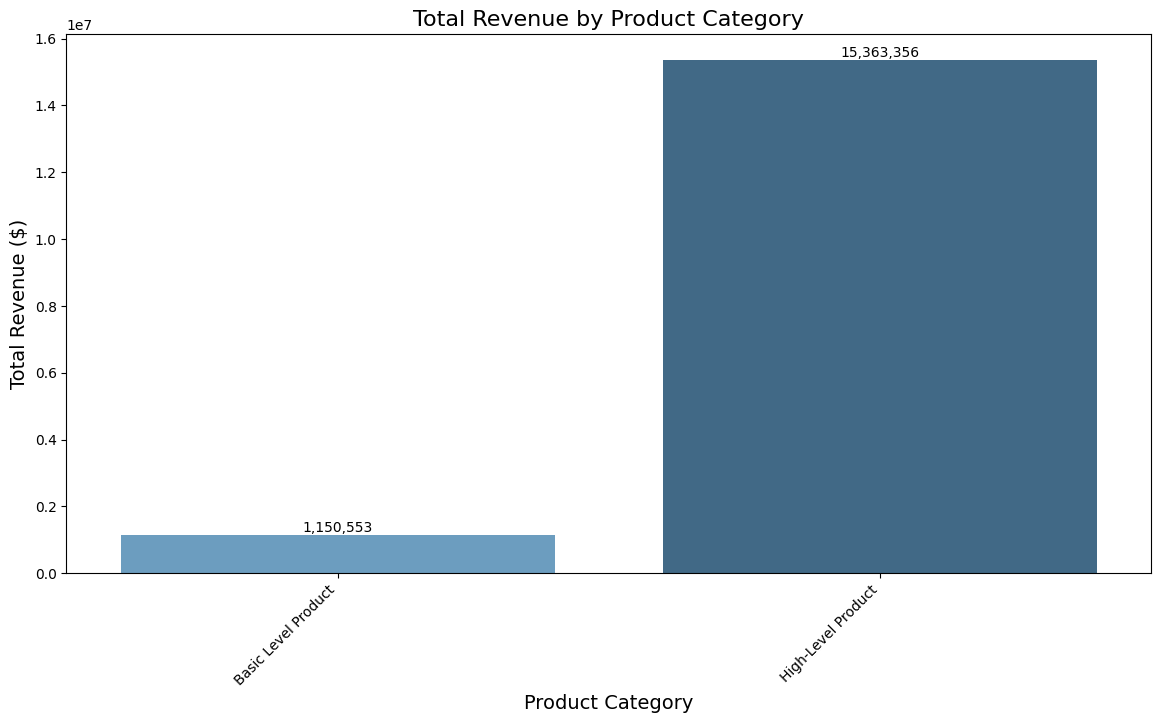

In [123]:
# Group by Product_Group and calculate the total revenue and total quantity ordered
revenue_by_product_group = combined_data_2019_sales.groupby('Product_Group')['Sales($)'].sum()
quantity_by_product_group = combined_data_2019_sales.groupby('Product_Group')['Quantity_Ordered'].sum()

# Plot the Total Revenue by Product_Group
plt.figure(figsize = (14, 7))
sns.barplot(x=revenue_by_product_group.index, y = revenue_by_product_group.values, palette = 'Blues_d')

# Annotate each bar with the revenue value
for index, value in enumerate(revenue_by_product_group):
    plt.text(index, value, f'{value:,.0f}', ha = 'center', va = 'bottom', fontsize = 10)

# Add titles and labels
plt.title('Total Revenue by Product Category', fontsize = 16)
plt.xlabel('Product Category', fontsize = 14)
plt.ylabel('Total Revenue ($)', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

# Show the plot
plt.show()

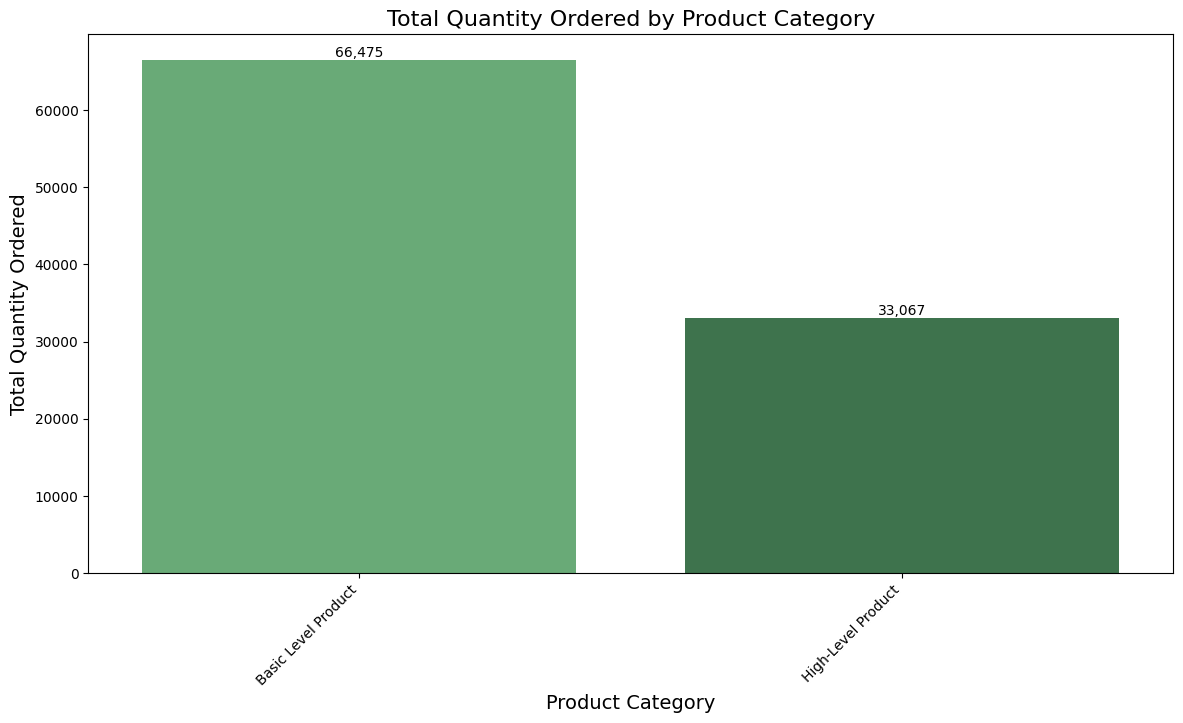

In [124]:
# Plot the total quantity ordered by Product_Group
plt.figure(figsize = (14, 7))
sns.barplot(x = quantity_by_product_group.index, y = quantity_by_product_group.values, palette = 'Greens_d')

# Annotate each bar with the quantity value
for index, value in enumerate(quantity_by_product_group):
    plt.text(index, value, f'{value:,.0f}', ha = 'center', va = 'bottom', fontsize = 10)

# Add titles and labels
plt.title('Total Quantity Ordered by Product Category', fontsize = 16)
plt.xlabel('Product Category', fontsize = 14)
plt.ylabel('Total Quantity Ordered', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')

# Show the plot
plt.show()

### 6. **Hypothesis Testing**

Null Hypothesis (H₀): There is a significant relationship between weekday and quantity ordered.

Alternative Hypothesis (H₁): There is no significant relationship between weekday and quantity ordered.

In [127]:
# Perform Spearman Rank correlation test
rho, p_value = stats.spearmanr(combined_data_2019_sales['Week_Day'], combined_data_2019_sales['Quantity_Ordered'])

# Define the significance level (alpha)
alpha = 0.05

# Print the results of the hypothesis test
print("\nResults of the hypothesis test:")
print("Spearman Correlation Coefficient (rho):", rho)
print("P-value:", p_value)

# Check if the p-value is less than alpha indicating statistical significance
if p_value < alpha:
    print("\nReject the null hypothesis")
    print("We conclude that there is not enough evidence to support the claim that there is a significant relationship between weekday and quantity ordered.")
else:
    print("\nFail to reject the null hypothesis")
    print("We conclude that there is enough evidence to support the claim that there is a significant relationship between weekday and quantity ordered.")



Results of the hypothesis test:
Spearman Correlation Coefficient (rho): 0.003381084626193035
P-value: 0.3145595189016607

Fail to reject the null hypothesis
We conclude that there is enough evidence to support the claim that there is a significant relationship between weekday and quantity ordered.


**Hypothesis Insights**

The Spearman Correlation Coefficient for the relationship between the day of the week and the quantity ordered is 0.003, with a p-value of 0.315. Since the p-value exceeds the commonly used significance level of 0.05, we fail to reject the null hypothesis. This result indicates that there is no significant relationship between the weekday and the quantity ordered.

Given this finding, it suggests that customer purchasing patterns are not significantly influenced by the day of the week. In other words, the quantity of products ordered does not vary substantially with different days of the week.

With the day of the week not showing a significant impact on order quantities, it is advisable for businesses to concentrate on other factors that might drive sales. These factors could include product type, pricing strategies, marketing efforts, and customer demographics, which are likely to have a more substantial effect on purchasing behavior. By focusing on these elements, businesses can enhance their sales performance and profitability more effectively.


### 7. **Saving Cleaned Dataset**

In [129]:
# Saving the combined_data_2019_sales in a .csv file

combined_data_2019_sales.to_csv('cleaned_2019_sales_data.csv', index = False)